# SPOTIFY DATA HIT PREDICTOR

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import glob

In [2]:
os.chdir(r'D:\Work\Datasets\the-spotify-hit-predictor-dataset')
csvFiles = glob.glob('*.csv')
csvFiles

['dataset-of-00s.csv',
 'dataset-of-10s.csv',
 'dataset-of-60s.csv',
 'dataset-of-70s.csv',
 'dataset-of-80s.csv',
 'dataset-of-90s.csv']

###### Read in individual data files and combining into one main file

In [184]:
dfConcatList = []
for file in csvFiles:
    df = pd.read_csv(file)
    print("The dataset contain {0} rows and {1} columns".format(df.shape[0],df.shape[1]))
    dfConcatList.append(df)
main_df = pd.concat(dfConcatList)
print("The dataset contain {0} rows and {1} columns".format(main_df.shape[0],main_df.shape[1]))


The dataset contain 5872 rows and 19 columns
The dataset contain 6398 rows and 19 columns
The dataset contain 8642 rows and 19 columns
The dataset contain 7766 rows and 19 columns
The dataset contain 6908 rows and 19 columns
The dataset contain 5520 rows and 19 columns
The dataset contain 41106 rows and 19 columns


In [173]:
#Get info about the data
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37652 entries, 0 to 41105
Data columns (total 20 columns):
track               37652 non-null object
artist              37652 non-null object
uri                 37652 non-null object
danceability        37652 non-null float64
energy              37652 non-null float64
key                 37652 non-null int64
loudness            37652 non-null float64
mode                37652 non-null int64
speechiness         37652 non-null float64
acousticness        37652 non-null float64
instrumentalness    37652 non-null float64
liveness            37652 non-null float64
valence             37652 non-null float64
tempo               37652 non-null float64
duration_ms         37652 non-null int64
time_signature      37652 non-null int64
chorus_hit          37652 non-null float64
sections            37652 non-null int64
target              37652 non-null int64
popularity          37652 non-null int64
dtypes: float64(10), int64(7), object(3)
memory 

In [5]:
main_df.head()

acousticness             artist  chorus_hit  danceability  duration_ms  \
0      0.368000  Montgomery Gentry    30.88059         0.578       196707   
1      0.018500       Pretty Ricky    41.51106         0.704       242587   
2      0.000111         Candlemass    65.32887         0.162       338893   
3      0.000007      Zwartketterij    58.59528         0.188       255667   
4      0.363000   Billy Currington    22.62384         0.630       193760   

   energy  instrumentalness  key  liveness  loudness  mode  popularity  \
0   0.471           0.00000    4     0.159    -7.270     1        48.0   
1   0.854           0.00000   10     0.148    -5.477     0        57.0   
2   0.836           0.00457    9     0.174    -3.009     1         6.0   
3   0.994           0.07840    4     0.192    -3.745     1         0.0   
4   0.764           0.00000    2     0.125    -4.353     1        44.0   

   sections  speechiness  target    tempo  time_signature  \
0        13       0.0289       1  133.061               4   
1        10       0.1830       1   92.988               4   
2        13       0.0473       0   86.964               4   
3         9       0.1660       0  148.440               4   
4        10       0.0275       1  112.098               4   

                      track                                   uri  valence  
0                 Lucky Man  spotify:track:4GiXBCUF7H6YfNQsnBRIzl    0.532  
1            On The Hotline  spotify:track:1zyqZONW985Cs4osz9wlsu    0.688  
2        Clouds Of Dementia  spotify:track:6cHZf7RbxXCKwEkgAZT4mY    0.300  
3  Heavy Metal, Raise Hell!  spotify:track:2IjBPp2vMeX7LggzRN3iSX    0.333  
4           I Got A Feelin'  spotify:track:1tF370eYXUcWwkIvaq3IGz    0.631

## Gather additional data
###### The code below is used  to get 'popularity' for each song in the data by using Spotify API. We will use this variable for regression model.

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = #yourown
secret = #yourown

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
artistList = main_df['artist'].to_list()
trackList = main_df['track'].to_list()

def get_popularity(lenList):
    popularityList = []
    for i in range(lenList):
        a = artistList[i] + ' '
        try:
            popularity = sp.search(q='artist:' + a + 'track:' + trackList[i], type='track')['tracks']['items'][0]['popularity']
            popularityList.append(popularity)
        except:
            print('No data found!')
            popularityList.append(-1)
            
        
        print(str(i),popularity)
    return popularityList
    
popularity_values = get_popularity(len(artistList))
#main_df['popularity'] = popularity_values
#main_df.to_csv(r'Main/Consolidated.csv', index=False)

0 48
1 57
2 6
3 0
4 44
5 1
6 3
7 52
8 19
9 35
10 39
11 56
12 21
13 39
14 0
15 3
16 33
17 65
18 0
retrying ...1secs
19 56
20 51
21 15
22 9
No data found!
23 9
24 25
25 8
26 40
27 21
28 0
29 41
30 58
31 69
32 16
33 70
34 66
35 27
36 63
No data found!
37 63
38 65
No data found!
39 65
40 28
41 69
42 29
43 2
44 58
45 35
46 60
47 49
48 0
49 58
50 53
51 45
52 53
53 6
No data found!
54 6
55 59
56 63
57 7
58 68
59 0
60 44
61 27
62 29
63 38
64 60
65 8
66 41
67 45
68 49
69 10
70 16
71 15
72 64
73 55
74 29
75 42
76 36
77 13
78 57
79 0
80 0
81 47
82 47
No data found!
83 47
No data found!
84 47
85 40
86 0
87 2
88 60
89 42
90 22
91 0
92 68
93 27
No data found!
94 27
95 51
96 70
97 37
98 0
99 65
100 29
101 37
102 47
No data found!
103 47
104 38
105 58
106 0
107 5
retrying ...1secs
108 1
109 9
110 57
111 17
112 31
113 54
114 31
115 73
116 1
117 13
118 55
119 6
No data found!
120 6
121 37
122 42
123 15
124 49
125 0
126 58
127 0
128 9
129 32
130 56
131 33
132 73
133 28
No data found!
134 28
135 38
136 0


932 56
933 55
934 27
935 72
936 46
937 7
938 0
939 30
940 10
941 50
No data found!
942 50
943 52
944 52
945 4
No data found!
946 4
retrying ...1secs
947 26
948 31
949 16
950 56
951 61
952 9
953 37
954 15
955 45
956 66
957 16
958 26
959 62
960 27
961 32
962 46
963 3
No data found!
964 3
965 6
966 54
967 61
968 41
969 51
970 38
971 40
972 7
973 3
974 70
No data found!
975 70
976 30
977 45
No data found!
978 45
979 51
980 35
981 37
982 38
No data found!
983 38
984 5
985 57
986 26
987 34
988 63
989 72
990 50
991 53
992 64
993 75
994 23
995 0
996 31
997 43
No data found!
998 43
999 63
1000 20
1001 71
1002 42
1003 2
1004 61
1005 21
1006 48
No data found!
1007 48
1008 30
1009 38
1010 50
1011 37
1012 0
1013 26
1014 11
1015 46
1016 45
1017 51
1018 31
1019 48
1020 61
No data found!
1021 61
1022 34
1023 24
1024 6
1025 57
1026 37
1027 0
1028 28
1029 38
1030 59
1031 55
1032 42
1033 57
1034 68
1035 55
1036 7
1037 28
1038 0
1039 1
1040 50
1041 67
1042 55
1043 63
1044 68
1045 8
1046 11
1047 67
No data

1779 6
1780 26
No data found!
1781 26
No data found!
1782 26
1783 1
1784 58
No data found!
1785 58
1786 24
No data found!
1787 24
1788 38
1789 43
1790 56
1791 33
1792 42
No data found!
1793 42
1794 8
1795 30
1796 4
1797 41
No data found!
1798 41
1799 45
1800 66
No data found!
1801 66
1802 54
1803 22
1804 0
1805 50
1806 80
1807 43
1808 69
1809 38
1810 59
1811 65
1812 0
1813 50
No data found!
1814 50
retrying ...5secs
1815 0
1816 21
1817 58
1818 40
1819 32
1820 47
1821 74
No data found!
1822 74
1823 26
No data found!
1824 26
1825 65
1826 51
1827 28
No data found!
1828 28
1829 27
No data found!
1830 27
1831 34
1832 46
1833 66
1834 57
1835 59
1836 6
1837 64
1838 37
No data found!
1839 37
1840 47
No data found!
1841 47
1842 37
1843 36
1844 55
1845 27
1846 40
No data found!
1847 40
1848 9
1849 56
1850 26
1851 24
1852 3
1853 26
1854 62
1855 29
1856 32
1857 52
1858 27
No data found!
1859 27
1860 20
No data found!
1861 20
1862 1
1863 39
1864 34
1865 62
No data found!
1866 62
1867 0
1868 55
1869

2585 16
2586 5
2587 55
2588 53
2589 57
2590 57
2591 22
2592 32
2593 55
2594 55
2595 0
2596 44
2597 0
2598 38
2599 33
2600 61
2601 26
2602 58
2603 60
2604 3
2605 0
2606 66
2607 58
2608 35
2609 3
2610 44
2611 54
No data found!
2612 54
No data found!
2613 54
2614 26
2615 28
2616 37
2617 36
2618 53
2619 29
2620 42
2621 46
2622 27
2623 28
2624 29
No data found!
2625 29
2626 18
2627 42
2628 1
2629 18
2630 7
2631 68
2632 61
retrying ...5secs
2633 48
No data found!
2634 48
2635 55
2636 1
2637 34
2638 27
2639 40
2640 35
2641 0
2642 45
2643 0
2644 5
2645 47
2646 70
2647 49
2648 0
2649 0
2650 28
2651 46
2652 54
No data found!
2653 54
2654 0
No data found!
2655 0
2656 71
2657 38
2658 25
No data found!
2659 25
2660 1
2661 10
2662 5
2663 55
No data found!
2664 55
2665 37
2666 35
2667 65
No data found!
2668 65
2669 54
2670 50
2671 68
2672 7
2673 48
No data found!
2674 48
2675 53
2676 0
2677 12
2678 41
2679 42
2680 14
No data found!
2681 14
2682 64
2683 39
2684 31
2685 59
2686 29
2687 46
2688 43
2689 

3407 63
3408 45
3409 45
3410 32
3411 20
3412 28
3413 35
3414 3
3415 7
3416 76
3417 3
3418 0
No data found!
3419 0
3420 36
3421 75
3422 25
3423 73
3424 20
3425 50
3426 77
3427 76
3428 0
3429 56
3430 13
3431 0
3432 4
3433 0
No data found!
3434 0
3435 0
3436 66
No data found!
3437 66
3438 38
3439 26
3440 36
3441 51
3442 20
3443 53
3444 0
3445 35
3446 60
3447 66
3448 42
retrying ...3secs
No data found!
3449 42
3450 59
3451 33
3452 6
3453 53
3454 24
3455 52
3456 54
3457 36
No data found!
3458 36
3459 0
3460 28
3461 22
3462 42
3463 43
3464 55
3465 20
3466 9
3467 58
3468 26
3469 55
3470 41
No data found!
3471 41
3472 38
No data found!
3473 38
No data found!
3474 38
3475 27
3476 63
3477 59
3478 35
3479 21
No data found!
3480 21
3481 37
3482 58
3483 37
3484 0
3485 41
3486 22
3487 21
3488 54
3489 35
3490 47
3491 42
3492 50
3493 51
3494 43
3495 20
3496 34
3497 16
3498 19
3499 56
No data found!
3500 56
3501 54
3502 28
3503 39
3504 51
3505 18
3506 2
3507 55
3508 29
3509 53
3510 0
No data found!
351

4222 5
4223 24
4224 50
4225 52
4226 56
4227 0
4228 30
4229 28
4230 56
4231 4
4232 74
4233 57
4234 18
4235 18
4236 29
4237 48
4238 4
4239 33
4240 64
4241 36
4242 20
4243 62
4244 46
4245 19
4246 61
No data found!
4247 61
No data found!
4248 61
4249 48
4250 0
4251 43
4252 0
4253 55
4254 37
4255 4
4256 41
No data found!
4257 41
4258 3
4259 0
4260 17
4261 1
4262 12
4263 0
4264 25
4265 57
4266 11
4267 58
No data found!
4268 58
4269 24
4270 10
4271 6
4272 0
4273 10
4274 29
4275 19
4276 43
retrying ...3secs
4277 67
4278 55
4279 4
No data found!
4280 4
4281 24
4282 32
No data found!
4283 32
4284 74
No data found!
4285 74
No data found!
4286 74
4287 31
4288 2
4289 12
4290 57
4291 64
4292 52
4293 12
4294 16
4295 59
4296 0
4297 36
4298 54
4299 53
4300 22
4301 48
4302 71
4303 30
4304 47
4305 42
4306 63
4307 14
4308 5
4309 66
4310 24
4311 31
4312 59
4313 17
4314 8
4315 5
4316 61
4317 50
4318 35
4319 32
4320 35
retrying ...4secs
4321 52
4322 40
4323 58
4324 23
4325 46
No data found!
4326 46
4327 54
4

5053 28
5054 65
5055 37
5056 50
5057 42
5058 26
No data found!
5059 26
5060 52
5061 0
5062 42
5063 0
5064 62
5065 0
5066 11
5067 23
5068 62
5069 36
5070 67
5071 14
5072 15
5073 13
5074 7
5075 26
5076 11
5077 55
5078 60
5079 64
5080 10
5081 34
5082 27
5083 69
5084 43
5085 37
5086 30
5087 42
5088 59
5089 9
No data found!
5090 9
5091 71
5092 50
5093 65
5094 17
5095 30
No data found!
5096 30
No data found!
5097 30
5098 54
5099 38
No data found!
5100 38
No data found!
5101 38
5102 29
5103 16
5104 19
5105 2
5106 55
5107 19
5108 26
5109 64
5110 3
5111 34
5112 64
5113 70
5114 47
5115 62
5116 51
5117 80
5118 13
5119 62
5120 56
5121 60
5122 59
5123 32
5124 26
5125 24
5126 61
5127 65
No data found!
5128 65
5129 18
5130 33
5131 55
5132 34
No data found!
5133 34
5134 0
retrying ...3secs
5135 61
5136 32
5137 56
5138 0
5139 61
5140 47
No data found!
5141 47
5142 11
No data found!
5143 11
5144 30
5145 37
5146 61
5147 56
5148 21
5149 4
5150 37
5151 58
5152 16
5153 26
5154 62
5155 42
No data found!
5156

5878 54
5879 32
5880 0
No data found!
5881 0
5882 65
5883 60
5884 24
5885 50
5886 41
5887 76
No data found!
5888 76
No data found!
5889 76
5890 66
5891 64
5892 53
No data found!
5893 53
5894 49
No data found!
5895 49
5896 5
5897 20
5898 7
5899 61
5900 42
No data found!
5901 42
5902 66
5903 84
No data found!
5904 84
No data found!
5905 84
5906 35
5907 74
5908 58
5909 72
5910 37
No data found!
5911 37
5912 18
5913 15
5914 33
5915 71
5916 85
5917 0
5918 0
5919 63
No data found!
5920 63
No data found!
5921 63
5922 57
5923 8
5924 46
5925 44
5926 0
5927 5
5928 37
5929 16
5930 84
No data found!
5931 84
5932 50
No data found!
5933 50
5934 0
retrying ...4secs
5935 62
5936 62
5937 49
No data found!
5938 49
No data found!
5939 49
No data found!
5940 49
5941 42
No data found!
5942 42
5943 46
5944 86
5945 59
5946 37
5947 35
No data found!
5948 35
5949 47
5950 51
5951 57
5952 0
No data found!
5953 0
5954 0
5955 54
5956 23
5957 2
No data found!
5958 2
No data found!
5959 2
5960 51
5961 5
5962 18
5963

6647 61
No data found!
6648 61
6649 0
6650 44
6651 67
No data found!
6652 67
6653 64
6654 9
6655 75
6656 57
No data found!
6657 57
6658 52
No data found!
6659 52
6660 8
6661 83
6662 66
6663 16
6664 61
6665 65
No data found!
6666 65
6667 51
6668 59
6669 0
No data found!
6670 0
No data found!
6671 0
6672 61
6673 21
6674 28
6675 65
No data found!
6676 65
6677 17
6678 19
6679 77
6680 69
6681 52
6682 54
No data found!
6683 54
6684 54
6685 58
6686 78
6687 59
No data found!
6688 59
6689 65
No data found!
6690 65
6691 62
6692 12
6693 10
6694 67
6695 55
No data found!
6696 55
6697 60
No data found!
6698 60
6699 30
No data found!
6700 30
6701 52
No data found!
6702 52
6703 80
6704 0
6705 74
No data found!
6706 74
No data found!
6707 74
6708 49
6709 82
No data found!
6710 82
6711 50
6712 8
6713 59
No data found!
6714 59
6715 0
6716 18
6717 0
No data found!
6718 0
6719 10
No data found!
6720 10
6721 59
6722 20
6723 65
No data found!
6724 65
6725 65
No data found!
6726 65
6727 0
6728 65
6729 63
673

7372 53
7373 5
7374 51
7375 9
retrying ...2secs
7376 59
7377 1
7378 55
7379 53
7380 78
7381 49
No data found!
7382 49
7383 27
7384 0
7385 76
7386 24
7387 53
7388 52
7389 56
No data found!
7390 56
7391 64
No data found!
7392 64
7393 57
7394 1
7395 38
7396 55
7397 59
7398 2
7399 50
7400 50
7401 83
7402 14
7403 55
7404 40
No data found!
7405 40
7406 20
7407 9
No data found!
7408 9
7409 0
7410 56
7411 4
No data found!
7412 4
7413 60
No data found!
7414 60
7415 59
7416 23
7417 24
7418 97
7419 52
7420 24
7421 60
7422 57
7423 74
retrying ...6secs
7424 89
7425 61
7426 11
7427 57
No data found!
7428 57
7429 62
7430 71
7431 38
7432 58
7433 24
7434 7
7435 9
7436 63
7437 77
7438 70
No data found!
7439 70
7440 24
7441 46
No data found!
7442 46
7443 20
7444 18
7445 7
7446 48
7447 40
7448 55
7449 34
7450 51
7451 44
7452 10
No data found!
7453 10
No data found!
7454 10
7455 66
No data found!
7456 66
7457 40
7458 77
7459 43
7460 57
No data found!
7461 57
7462 37
No data found!
7463 37
7464 57
7465 9
No

8134 24
8135 62
8136 54
8137 65
8138 11
8139 78
8140 57
No data found!
8141 57
8142 62
8143 42
No data found!
8144 42
No data found!
8145 42
8146 7
8147 67
8148 71
8149 59
8150 51
No data found!
8151 51
No data found!
8152 51
8153 18
8154 18
8155 80
8156 25
8157 58
8158 66
8159 46
8160 67
8161 34
8162 36
8163 35
8164 58
8165 51
No data found!
8166 51
No data found!
8167 51
No data found!
8168 51
8169 74
8170 35
8171 45
8172 52
8173 59
8174 61
No data found!
8175 61
8176 54
8177 1
8178 69
8179 66
8180 11
No data found!
8181 11
8182 63
8183 53
8184 7
8185 52
8186 11
8187 62
8188 43
8189 56
8190 14
No data found!
8191 14
8192 15
8193 49
8194 43
8195 2
8196 9
No data found!
8197 9
8198 45
8199 1
8200 72
8201 29
retrying ...1secs
No data found!
8202 29
8203 0
8204 20
8205 1
8206 17
8207 78
8208 62
8209 71
8210 0
8211 49
8212 62
8213 1
8214 15
No data found!
8215 15
8216 0
8217 20
No data found!
8218 20
8219 9
8220 15
8221 19
No data found!
8222 19
8223 61
8224 60
8225 69
8226 46
No data fou

8917 0
8918 58
No data found!
8919 58
8920 67
8921 43
8922 62
8923 3
8924 59
8925 73
8926 27
No data found!
8927 27
8928 33
8929 25
8930 29
No data found!
8931 29
8932 17
8933 56
8934 45
No data found!
8935 45
No data found!
8936 45
No data found!
8937 45
8938 87
No data found!
8939 87
8940 34
8941 27
8942 27
8943 0
8944 0
8945 68
8946 14
No data found!
8947 14
8948 2
8949 43
No data found!
8950 43
8951 23
8952 48
8953 4
8954 61
8955 64
8956 45
8957 39
8958 60
8959 70
8960 84
No data found!
8961 84
8962 5
8963 61
8964 9
8965 38
8966 62
8967 47
8968 67
8969 55
8970 0
8971 0
No data found!
8972 0
No data found!
8973 0
No data found!
8974 0
8975 0
8976 0
8977 63
8978 12
8979 61
8980 66
8981 74
8982 50
8983 62
8984 63
8985 37
8986 39
8987 63
8988 1
No data found!
8989 1
8990 18
8991 61
No data found!
8992 61
8993 23
8994 19
8995 27
8996 69
8997 63
8998 55
8999 55
9000 50
9001 39
9002 48
9003 75
9004 58
9005 0
9006 69
9007 64
9008 76
9009 60
No data found!
9010 60
9011 60
9012 23
9013 4
901

9682 39
9683 14
9684 14
9685 71
9686 58
9687 69
9688 38
9689 64
9690 63
9691 45
9692 0
9693 61
9694 7
9695 13
9696 46
9697 46
9698 54
No data found!
9699 54
9700 4
9701 9
9702 64
9703 81
No data found!
9704 81
9705 71
9706 5
9707 24
9708 71
9709 59
No data found!
9710 59
No data found!
9711 59
9712 69
9713 73
9714 56
9715 54
9716 64
9717 23
9718 12
9719 47
No data found!
9720 47
9721 64
9722 53
No data found!
9723 53
9724 49
9725 4
9726 20
9727 8
No data found!
9728 8
9729 70
9730 42
No data found!
9731 42
No data found!
9732 42
9733 68
9734 48
9735 5
9736 3
9737 66
9738 58
9739 43
9740 46
9741 65
No data found!
9742 65
9743 57
9744 4
9745 63
9746 72
9747 40
9748 55
9749 16
9750 60
No data found!
9751 60
9752 58
9753 18
9754 69
9755 63
9756 38
9757 27
9758 71
9759 55
retrying ...3secs
9760 12
9761 39
No data found!
9762 39
9763 4
9764 70
No data found!
9765 70
9766 71
No data found!
9767 71
9768 73
9769 34
9770 40
9771 58
9772 69
9773 63
9774 62
No data found!
9775 62
9776 31
9777 32
9

10413 41
10414 57
10415 64
10416 25
10417 28
10418 20
10419 58
10420 83
No data found!
10421 83
10422 29
10423 58
10424 35
10425 53
10426 0
10427 45
10428 59
No data found!
10429 59
No data found!
10430 59
10431 74
10432 17
No data found!
10433 17
10434 52
10435 14
No data found!
10436 14
10437 44
10438 64
No data found!
10439 64
No data found!
10440 64
10441 78
10442 48
10443 52
No data found!
10444 52
No data found!
10445 52
10446 58
No data found!
10447 58
10448 37
No data found!
10449 37
10450 55
10451 55
10452 57
10453 75
10454 63
No data found!
10455 63
10456 17
No data found!
10457 17
10458 48
No data found!
10459 48
10460 32
10461 69
10462 56
No data found!
10463 56
10464 38
10465 45
10466 24
10467 65
10468 58
10469 38
10470 64
No data found!
10471 64
10472 66
10473 59
10474 68
10475 61
10476 59
10477 60
10478 10
10479 12
10480 52
10481 30
10482 49
10483 70
10484 66
10485 47
10486 73
No data found!
10487 73
10488 40
10489 0
10490 24
10491 8
10492 33
No data found!
10493 33
1049

11115 11
11116 44
11117 76
11118 9
11119 66
11120 26
No data found!
11121 26
11122 91
11123 13
11124 0
11125 15
11126 0
No data found!
11127 0
11128 30
11129 20
11130 71
11131 0
11132 78
No data found!
11133 78
11134 3
11135 62
11136 59
11137 19
11138 53
11139 84
11140 61
11141 5
No data found!
11142 5
11143 67
11144 54
11145 22
11146 13
11147 40
No data found!
11148 40
11149 0
No data found!
11150 0
11151 67
11152 8
No data found!
11153 8
11154 66
11155 70
11156 65
11157 33
11158 35
11159 1
11160 10
11161 62
11162 80
11163 46
11164 74
11165 47
11166 1
11167 44
11168 59
11169 63
11170 29
11171 65
No data found!
11172 65
11173 54
11174 33
No data found!
11175 33
11176 0
11177 41
11178 0
11179 60
No data found!
11180 60
11181 74
No data found!
11182 74
11183 26
11184 42
No data found!
11185 42
11186 2
11187 74
No data found!
11188 74
11189 31
11190 43
11191 57
No data found!
11192 57
11193 77
11194 68
11195 45
11196 6
11197 24
11198 63
11199 25
11200 48
No data found!
11201 48
11202 27
1

11835 76
No data found!
11836 76
11837 77
11838 44
No data found!
11839 44
11840 42
11841 52
11842 69
11843 50
No data found!
11844 50
No data found!
11845 50
No data found!
11846 50
11847 51
No data found!
11848 51
11849 0
11850 38
No data found!
11851 38
11852 51
11853 59
11854 0
11855 49
11856 55
11857 65
11858 54
11859 57
11860 30
11861 49
No data found!
11862 49
11863 39
11864 46
No data found!
11865 46
11866 55
11867 46
No data found!
11868 46
11869 66
11870 41
11871 54
11872 64
11873 72
11874 0
11875 55
11876 31
11877 52
11878 8
11879 47
No data found!
11880 47
No data found!
11881 47
11882 27
11883 51
No data found!
11884 51
11885 0
11886 51
11887 0
11888 55
11889 32
11890 38
No data found!
11891 38
11892 1
11893 7
11894 49
No data found!
11895 49
11896 55
No data found!
11897 55
11898 19
11899 56
11900 19
11901 71
11902 44
11903 39
11904 62
No data found!
11905 62
11906 50
11907 77
11908 58
No data found!
11909 58
No data found!
11910 58
No data found!
11911 58
No data found!


No data found!
12597 23
12598 16
12599 38
No data found!
12600 38
12601 6
12602 10
12603 0
12604 2
12605 26
12606 12
12607 8
12608 2
12609 4
12610 16
12611 0
12612 0
No data found!
12613 0
12614 0
12615 30
12616 39
12617 16
12618 10
12619 3
12620 0
12621 37
12622 22
12623 20
12624 10
12625 59
12626 60
12627 14
12628 0
12629 7
12630 57
No data found!
12631 57
12632 1
12633 12
12634 23
12635 4
12636 17
12637 15
12638 5
12639 7
12640 0
12641 26
12642 35
12643 18
12644 1
12645 8
12646 0
12647 27
12648 15
12649 3
12650 7
12651 28
12652 34
12653 4
12654 5
12655 0
retrying ...3secs
12656 0
12657 0
12658 14
12659 9
12660 1
12661 0
12662 12
12663 0
12664 3
12665 18
12666 19
12667 59
12668 9
12669 14
12670 39
12671 10
12672 25
12673 30
12674 56
12675 6
12676 19
12677 0
12678 31
12679 23
12680 0
12681 3
12682 2
12683 0
12684 5
12685 47
12686 5
No data found!
12687 5
12688 4
12689 0
12690 13
12691 3
12692 10
12693 9
12694 28
12695 0
12696 26
12697 11
12698 31
12699 12
12700 13
12701 0
retrying ...

13498 33
13499 32
13500 58
13501 0
13502 8
13503 19
13504 39
13505 31
13506 0
13507 46
13508 0
13509 15
13510 40
13511 11
13512 35
13513 3
13514 3
13515 43
13516 0
13517 22
13518 31
13519 19
13520 21
13521 61
13522 30
13523 10
13524 1
13525 22
13526 19
13527 23
13528 5
13529 25
13530 7
13531 32
13532 5
13533 38
13534 8
13535 0
13536 6
13537 10
13538 38
13539 15
No data found!
13540 15
13541 0
13542 12
13543 5
13544 65
13545 27
13546 12
13547 0
13548 0
13549 21
13550 27
13551 19
13552 2
13553 44
13554 1
13555 38
13556 0
No data found!
13557 0
13558 27
13559 43
13560 31
13561 37
13562 1
13563 61
13564 14
13565 47
13566 16
13567 27
13568 0
13569 33
13570 17
13571 50
13572 12
No data found!
13573 12
13574 22
13575 20
13576 0
13577 30
13578 37
13579 35
13580 4
13581 8
13582 36
13583 0
13584 0
No data found!
13585 0
13586 21
13587 29
13588 21
13589 8
13590 27
13591 25
13592 0
No data found!
13593 0
13594 32
13595 28
13596 75
13597 25
13598 9
13599 38
No data found!
13600 38
No data found!
13

14382 12
14383 34
14384 50
14385 25
14386 1
14387 2
14388 6
14389 17
14390 0
14391 17
14392 36
14393 11
14394 20
14395 33
14396 18
14397 0
14398 59
14399 21
14400 0
14401 2
14402 43
14403 54
14404 16
14405 33
14406 11
14407 0
14408 41
14409 16
14410 10
14411 11
14412 19
14413 43
14414 0
14415 0
14416 0
14417 0
14418 40
14419 4
14420 0
14421 11
14422 8
14423 1
14424 17
14425 13
14426 30
14427 13
14428 30
14429 28
14430 28
14431 3
14432 37
14433 20
14434 18
14435 6
14436 45
14437 35
14438 55
14439 3
14440 8
14441 0
14442 32
14443 11
14444 1
14445 0
14446 5
14447 17
14448 27
14449 6
14450 15
14451 37
14452 11
14453 7
14454 0
14455 55
14456 9
14457 30
14458 0
No data found!
14459 0
14460 70
14461 58
No data found!
14462 58
14463 50
14464 18
14465 0
14466 16
14467 0
No data found!
14468 0
14469 1
14470 47
14471 35
14472 26
14473 49
14474 1
14475 0
14476 30
14477 32
14478 31
14479 8
14480 40
No data found!
14481 40
14482 24
14483 31
14484 44
14485 37
14486 3
14487 23
No data found!
14488 23


15267 68
15268 4
15269 44
15270 3
15271 0
15272 15
15273 15
15274 34
15275 9
15276 24
15277 2
15278 2
15279 21
15280 4
15281 24
15282 6
15283 40
15284 9
15285 12
15286 0
15287 56
15288 4
15289 2
15290 28
15291 12
15292 27
15293 2
15294 0
15295 0
15296 24
15297 13
15298 1
15299 0
15300 6
15301 18
15302 18
15303 30
15304 9
15305 58
15306 6
15307 0
15308 15
15309 12
15310 45
15311 0
15312 2
15313 21
No data found!
15314 21
15315 0
15316 6
15317 15
15318 26
15319 20
15320 0
15321 21
15322 9
15323 0
15324 46
15325 38
15326 10
15327 16
15328 45
15329 14
15330 5
15331 0
15332 0
15333 5
15334 47
15335 32
15336 18
15337 33
15338 0
15339 23
15340 0
15341 0
15342 47
15343 21
15344 24
15345 3
15346 6
15347 1
15348 5
15349 21
15350 32
15351 13
15352 6
15353 20
15354 33
15355 8
15356 39
15357 14
15358 40
15359 0
15360 27
15361 36
15362 0
No data found!
15363 0
15364 12
15365 0
15366 22
15367 0
15368 40
15369 55
15370 3
15371 5
15372 4
15373 33
15374 5
15375 26
15376 21
No data found!
15377 21
15378 

16170 2
16171 1
16172 19
16173 6
16174 6
16175 24
16176 47
16177 0
16178 50
16179 36
16180 0
16181 36
16182 16
16183 0
16184 6
16185 20
16186 5
No data found!
16187 5
16188 23
16189 53
16190 39
16191 1
16192 13
16193 24
16194 26
16195 0
16196 0
16197 22
16198 48
16199 28
16200 27
16201 32
16202 13
No data found!
16203 13
16204 60
16205 1
16206 49
16207 20
16208 3
16209 2
16210 19
16211 6
16212 1
16213 17
16214 9
16215 2
16216 2
16217 0
16218 11
16219 21
16220 16
16221 16
16222 31
16223 29
16224 17
16225 14
16226 32
16227 45
16228 35
16229 0
No data found!
16230 0
16231 2
16232 4
16233 23
16234 26
16235 0
No data found!
16236 0
16237 0
16238 8
No data found!
16239 8
16240 9
16241 14
16242 12
16243 39
16244 28
16245 50
16246 2
16247 35
16248 2
No data found!
16249 2
16250 0
16251 23
16252 0
16253 14
16254 43
16255 24
16256 4
16257 44
16258 2
16259 44
16260 12
16261 32
16262 0
16263 0
16264 33
16265 24
16266 14
16267 12
16268 13
16269 17
16270 32
16271 11
16272 5
16273 50
16274 16
16275 1

17040 75
17041 38
17042 0
17043 46
17044 22
17045 14
No data found!
17046 14
17047 43
17048 32
17049 13
17050 52
17051 56
No data found!
17052 56
17053 22
17054 24
17055 2
17056 45
17057 5
17058 5
17059 5
17060 4
17061 20
17062 47
17063 33
17064 52
17065 28
17066 2
No data found!
17067 2
17068 1
17069 34
17070 65
17071 0
17072 1
17073 43
17074 17
17075 27
17076 0
17077 7
17078 46
17079 0
17080 10
17081 12
17082 0
17083 8
17084 17
17085 32
17086 16
17087 3
17088 16
17089 15
17090 13
17091 17
17092 18
17093 16
17094 0
17095 73
17096 36
17097 17
17098 2
17099 9
17100 0
17101 1
17102 42
No data found!
17103 42
17104 28
17105 0
17106 20
17107 15
17108 60
17109 64
17110 10
17111 10
17112 18
17113 31
17114 0
17115 73
17116 23
17117 23
17118 3
17119 24
17120 12
17121 37
17122 15
17123 12
17124 24
17125 16
17126 40
17127 7
17128 8
17129 33
17130 9
17131 0
17132 47
No data found!
17133 47
17134 6
17135 50
17136 0
17137 7
17138 18
17139 69
17140 8
17141 0
17142 2
17143 0
17144 0
17145 6
17146 30


17933 0
17934 37
17935 48
17936 15
No data found!
17937 15
17938 38
No data found!
17939 38
17940 7
17941 21
17942 16
17943 15
17944 36
17945 0
17946 40
17947 33
17948 9
17949 27
17950 6
17951 4
17952 9
17953 5
17954 18
17955 0
17956 13
17957 0
17958 32
17959 19
17960 24
17961 20
17962 12
17963 1
17964 48
17965 14
17966 19
17967 32
17968 33
17969 52
17970 3
17971 0
17972 14
17973 5
No data found!
17974 5
17975 41
17976 0
17977 28
17978 25
17979 3
17980 44
17981 3
17982 14
17983 26
17984 41
17985 8
17986 73
17987 18
17988 4
17989 0
17990 9
17991 22
17992 25
17993 30
17994 4
17995 0
17996 69
17997 15
17998 23
17999 45
18000 15
18001 3
18002 18
18003 9
18004 0
18005 0
18006 0
18007 2
18008 2
18009 45
18010 2
18011 7
18012 10
18013 2
18014 26
18015 48
18016 18
18017 4
18018 17
18019 56
18020 29
18021 20
18022 44
18023 0
No data found!
18024 0
18025 16
18026 19
18027 1
18028 37
18029 16
18030 0
18031 0
18032 42
18033 1
No data found!
18034 1
18035 11
18036 2
18037 48
18038 39
18039 57
18040

18828 6
18829 19
18830 19
18831 17
18832 46
18833 2
18834 15
18835 14
18836 30
18837 15
18838 13
18839 56
18840 9
18841 0
18842 0
18843 27
18844 40
18845 24
No data found!
18846 24
18847 5
18848 45
18849 0
18850 0
18851 12
18852 29
18853 26
18854 40
18855 0
18856 13
18857 8
18858 21
18859 5
18860 53
18861 27
18862 7
18863 23
18864 10
18865 29
18866 8
18867 0
18868 51
18869 3
18870 4
No data found!
18871 4
18872 10
18873 26
18874 0
18875 12
18876 29
18877 31
No data found!
18878 31
18879 29
18880 15
18881 33
No data found!
18882 33
18883 18
18884 14
18885 11
18886 28
18887 10
18888 51
18889 17
18890 1
18891 17
18892 30
18893 0
18894 23
18895 20
18896 0
18897 0
18898 10
18899 43
18900 32
18901 13
18902 28
No data found!
18903 28
18904 22
18905 30
18906 10
18907 0
18908 6
18909 7
18910 48
18911 14
18912 0
18913 35
18914 18
18915 65
18916 34
18917 46
18918 30
18919 12
18920 19
18921 21
18922 16
18923 8
18924 12
18925 21
18926 10
18927 6
18928 2
18929 26
18930 3
18931 42
18932 7
18933 20
18

19696 1
19697 21
19698 29
19699 25
19700 36
19701 9
19702 25
19703 0
19704 6
19705 17
19706 34
19707 0
19708 0
19709 30
19710 58
19711 53
19712 9
19713 11
19714 1
19715 9
19716 30
19717 34
19718 0
19719 5
19720 0
19721 24
19722 28
19723 2
19724 23
19725 11
19726 28
19727 0
19728 5
19729 39
19730 1
19731 1
19732 14
19733 4
19734 1
19735 21
19736 3
19737 3
19738 9
19739 0
19740 40
19741 0
19742 5
19743 20
19744 0
19745 2
19746 30
19747 10
19748 43
19749 33
19750 13
19751 9
19752 15
19753 6
19754 17
19755 34
19756 2
19757 37
19758 9
19759 22
19760 3
19761 0
No data found!
19762 0
19763 32
19764 25
19765 35
19766 19
19767 18
19768 0
19769 10
19770 7
No data found!
19771 7
19772 0
19773 24
19774 19
19775 6
19776 3
retrying ...2secs
19777 24
19778 48
19779 62
19780 0
19781 0
19782 2
19783 0
19784 39
No data found!
19785 39
19786 0
No data found!
19787 0
19788 16
19789 31
19790 1
19791 20
19792 7
19793 15
19794 2
19795 7
19796 20
19797 52
19798 55
19799 10
19800 1
19801 0
19802 28
19803 14
19

20562 1
20563 23
20564 52
20565 29
20566 33
20567 0
20568 14
20569 42
20570 18
20571 2
20572 44
20573 53
20574 12
20575 59
20576 51
20577 56
20578 0
20579 25
20580 21
20581 57
20582 34
20583 0
20584 0
20585 5
20586 53
20587 0
20588 0
20589 21
20590 12
20591 27
20592 43
20593 4
20594 16
20595 0
20596 21
20597 26
20598 32
No data found!
20599 32
No data found!
20600 32
20601 0
20602 0
20603 0
20604 5
20605 25
20606 22
20607 2
20608 1
20609 2
20610 29
20611 8
20612 0
20613 16
20614 1
20615 2
No data found!
20616 2
20617 24
20618 33
20619 51
20620 23
20621 17
20622 5
20623 5
20624 0
20625 42
20626 54
20627 20
20628 54
20629 15
20630 12
20631 0
20632 12
20633 19
20634 0
20635 38
20636 21
20637 53
20638 0
20639 21
20640 22
20641 32
20642 37
20643 31
20644 22
20645 7
20646 0
20647 71
20648 47
20649 5
20650 0
20651 15
20652 0
20653 0
20654 2
20655 18
20656 1
20657 20
20658 27
20659 41
20660 24
20661 49
20662 23
No data found!
20663 23
20664 1
20665 0
20666 23
20667 66
20668 40
20669 22
20670 2

21445 49
21446 0
No data found!
21447 0
21448 7
21449 11
21450 17
21451 32
21452 13
21453 12
21454 30
21455 10
21456 0
21457 24
21458 59
21459 4
21460 20
21461 67
21462 44
21463 37
21464 5
21465 30
21466 68
21467 10
21468 56
21469 16
21470 0
21471 52
21472 10
21473 10
21474 2
21475 12
21476 52
21477 15
21478 7
No data found!
21479 7
21480 30
21481 0
21482 17
21483 17
21484 25
21485 1
21486 7
21487 6
No data found!
21488 6
21489 51
21490 26
21491 8
21492 29
21493 21
21494 6
No data found!
21495 6
21496 0
21497 54
21498 11
21499 35
21500 48
21501 13
21502 8
21503 46
21504 31
21505 55
21506 4
21507 51
21508 16
21509 29
21510 6
21511 13
21512 37
No data found!
21513 37
21514 30
21515 2
21516 14
21517 3
21518 62
21519 38
21520 15
21521 46
21522 0
21523 10
21524 8
21525 31
21526 45
21527 18
21528 48
21529 0
21530 5
21531 1
21532 37
21533 27
21534 35
21535 0
21536 0
21537 0
21538 10
21539 31
21540 62
21541 32
21542 15
21543 28
21544 39
21545 4
21546 11
21547 8
21548 53
21549 14
21550 5
21551 

22299 31
22300 47
22301 66
22302 21
22303 8
22304 1
22305 19
22306 32
22307 12
22308 3
22309 16
22310 21
22311 2
22312 55
No data found!
22313 55
22314 4
22315 40
22316 36
22317 35
22318 13
22319 6
22320 69
22321 21
22322 22
22323 5
22324 11
22325 8
22326 26
22327 40
22328 0
22329 24
22330 30
22331 34
22332 33
22333 36
22334 62
22335 58
22336 11
22337 43
22338 29
22339 28
22340 1
22341 25
22342 56
22343 11
22344 9
22345 26
22346 7
22347 2
22348 3
22349 42
No data found!
22350 42
22351 27
22352 0
22353 53
22354 6
22355 3
22356 6
22357 26
22358 34
22359 21
22360 29
No data found!
22361 29
22362 21
22363 19
22364 12
22365 30
22366 23
22367 53
22368 1
No data found!
22369 1
22370 57
22371 9
22372 37
22373 44
22374 60
22375 20
22376 7
22377 21
22378 23
22379 3
22380 49
22381 32
22382 17
22383 2
22384 0
22385 2
22386 46
22387 8
22388 13
22389 41
22390 20
22391 9
22392 34
22393 6
22394 37
No data found!
22395 37
22396 68
22397 0
22398 72
retrying ...1secs
22399 0
22400 8
22401 37
22402 21
224

23159 5
23160 57
23161 11
23162 52
23163 17
23164 40
23165 1
23166 21
23167 28
23168 3
23169 3
23170 41
23171 10
23172 0
23173 8
23174 3
23175 58
23176 14
23177 19
23178 27
23179 12
23180 2
23181 11
23182 8
23183 0
23184 1
23185 42
23186 35
23187 5
23188 51
23189 39
No data found!
23190 39
23191 0
23192 27
23193 14
23194 0
23195 38
23196 37
23197 3
23198 39
23199 13
23200 80
23201 9
23202 50
23203 45
No data found!
23204 45
23205 0
23206 40
23207 21
23208 30
23209 2
23210 7
23211 25
23212 37
23213 0
23214 3
23215 59
23216 6
23217 9
23218 42
23219 41
23220 74
23221 34
23222 69
23223 21
23224 0
23225 7
23226 10
No data found!
23227 10
23228 4
23229 21
23230 0
No data found!
23231 0
No data found!
23232 0
23233 39
23234 6
23235 9
23236 17
23237 51
23238 47
23239 24
23240 17
23241 16
23242 26
23243 48
23244 2
No data found!
23245 2
23246 10
No data found!
23247 10
23248 40
23249 16
23250 2
23251 33
23252 6
23253 10
23254 33
23255 38
No data found!
23256 38
No data found!
23257 38
23258 0
2

24023 33
24024 29
24025 37
24026 11
24027 0
24028 21
24029 42
24030 7
24031 22
24032 14
24033 6
24034 47
24035 41
24036 23
24037 1
24038 53
24039 44
24040 27
24041 29
24042 1
24043 4
24044 41
24045 2
24046 19
24047 14
24048 18
24049 17
24050 37
24051 33
24052 56
24053 14
24054 2
24055 29
24056 19
24057 21
24058 1
24059 70
24060 0
24061 67
24062 53
No data found!
24063 53
24064 10
24065 54
24066 31
24067 38
24068 7
24069 17
24070 9
24071 30
24072 3
24073 0
24074 25
24075 46
24076 14
24077 9
24078 4
24079 7
24080 36
24081 35
24082 49
24083 15
24084 21
24085 22
24086 32
24087 25
24088 36
24089 11
24090 36
24091 2
24092 31
24093 0
24094 19
24095 42
24096 15
24097 13
24098 8
24099 26
24100 4
24101 15
24102 34
No data found!
24103 34
No data found!
24104 34
24105 15
24106 41
24107 33
24108 20
24109 54
24110 38
24111 17
24112 20
24113 18
24114 58
24115 15
24116 37
24117 52
No data found!
24118 52
24119 7
No data found!
24120 7
24121 16
24122 78
24123 65
24124 16
24125 7
24126 24
24127 29
2412

24904 16
24905 7
24906 39
24907 14
24908 32
24909 4
24910 22
24911 44
24912 0
24913 31
24914 43
24915 44
24916 51
24917 13
24918 61
24919 11
24920 30
24921 71
24922 9
24923 7
24924 35
24925 54
24926 33
24927 30
24928 5
24929 15
24930 13
24931 14
24932 14
24933 0
24934 15
24935 38
24936 18
24937 6
24938 9
24939 55
24940 17
24941 44
24942 15
24943 6
24944 55
24945 7
24946 12
24947 34
24948 47
24949 0
24950 20
24951 45
24952 14
24953 42
24954 20
24955 3
24956 35
24957 10
24958 0
24959 6
24960 0
24961 0
24962 1
24963 0
24964 23
24965 19
24966 3
24967 46
24968 11
24969 37
24970 12
24971 7
24972 40
24973 16
24974 9
24975 36
24976 37
24977 7
24978 12
24979 15
24980 8
24981 62
24982 0
24983 21
24984 35
24985 25
24986 0
24987 35
24988 11
24989 37
24990 9
24991 5
No data found!
24992 5
24993 0
24994 8
24995 34
24996 8
24997 12
24998 14
24999 1
25000 1
25001 15
No data found!
25002 15
25003 0
25004 34
25005 19
No data found!
25006 19
25007 0
25008 7
25009 25
25010 27
25011 2
25012 16
25013 23
250

25764 31
25765 63
No data found!
25766 63
25767 27
25768 68
25769 32
25770 39
25771 41
25772 13
25773 10
25774 19
25775 47
25776 26
25777 44
25778 0
No data found!
25779 0
25780 7
25781 8
25782 4
25783 64
25784 5
25785 43
25786 62
25787 62
25788 28
25789 9
No data found!
25790 9
25791 13
25792 5
25793 5
25794 25
25795 31
25796 9
25797 2
25798 41
25799 18
25800 8
25801 53
25802 10
25803 51
25804 0
25805 6
25806 4
25807 20
25808 49
25809 4
25810 4
25811 17
25812 6
25813 17
No data found!
25814 17
25815 39
25816 36
25817 53
25818 22
25819 39
25820 36
25821 14
25822 48
25823 4
25824 6
25825 32
25826 15
25827 15
25828 31
25829 40
25830 47
25831 37
25832 3
25833 0
25834 72
25835 16
25836 3
25837 3
25838 49
25839 24
25840 17
25841 39
25842 17
25843 32
25844 40
25845 3
25846 11
25847 25
25848 17
25849 5
25850 36
25851 3
25852 11
25853 32
25854 38
25855 8
25856 0
25857 18
25858 5
25859 11
25860 27
25861 21
25862 25
25863 17
25864 4
25865 45
25866 53
25867 11
25868 2
25869 19
25870 20
25871 22
2

26619 1
26620 31
26621 64
26622 76
26623 16
26624 51
26625 14
26626 48
26627 52
26628 4
26629 40
26630 28
26631 17
26632 27
retrying ...3secs
26633 8
26634 24
26635 12
26636 0
26637 15
26638 67
26639 44
26640 41
26641 61
26642 0
26643 22
26644 0
26645 9
26646 26
26647 6
26648 12
No data found!
26649 12
26650 8
26651 2
26652 14
26653 9
26654 44
26655 7
26656 21
26657 13
26658 10
26659 39
26660 58
26661 28
26662 30
26663 39
26664 23
26665 9
26666 34
26667 22
26668 39
26669 21
26670 50
26671 14
26672 0
26673 19
26674 23
26675 37
26676 37
26677 47
26678 48
26679 43
26680 28
26681 13
26682 4
26683 26
26684 0
26685 2
26686 15
26687 13
26688 7
26689 63
26690 2
26691 0
26692 13
26693 27
26694 36
26695 7
26696 16
26697 11
26698 11
26699 49
26700 25
26701 18
26702 9
26703 28
26704 7
26705 58
26706 66
26707 14
26708 43
26709 27
26710 43
26711 0
26712 25
26713 3
26714 34
26715 9
26716 24
26717 17
26718 24
26719 15
26720 20
26721 31
26722 8
26723 12
26724 38
26725 30
26726 47
26727 19
26728 16
2672

27466 2
27467 49
27468 51
27469 9
27470 22
27471 2
27472 10
27473 23
27474 16
27475 12
27476 15
27477 11
No data found!
27478 11
27479 0
27480 43
27481 28
27482 0
27483 4
27484 0
No data found!
27485 0
27486 34
27487 42
27488 40
27489 9
27490 25
27491 69
27492 0
27493 4
27494 0
27495 35
27496 6
27497 11
27498 35
27499 43
27500 0
27501 11
27502 76
27503 8
27504 0
27505 21
27506 6
27507 0
27508 65
27509 45
27510 7
27511 21
27512 42
No data found!
27513 42
27514 37
27515 52
No data found!
27516 52
27517 52
27518 35
27519 30
27520 28
27521 28
27522 7
27523 1
27524 1
27525 11
27526 19
27527 4
27528 10
27529 31
27530 0
27531 40
27532 26
27533 31
27534 41
27535 12
27536 4
27537 0
27538 60
27539 43
27540 6
27541 14
27542 11
27543 16
27544 29
27545 17
27546 0
27547 56
27548 14
27549 23
27550 0
27551 30
27552 18
27553 52
27554 9
27555 0
27556 14
27557 26
27558 28
27559 9
No data found!
27560 9
27561 20
27562 20
27563 4
27564 40
27565 6
27566 1
27567 21
27568 13
27569 36
27570 55
27571 13
27572 3

28311 8
28312 11
28313 5
28314 50
28315 70
28316 55
28317 12
28318 11
28319 15
28320 14
28321 6
28322 27
28323 70
28324 14
28325 35
28326 0
28327 10
28328 18
28329 35
28330 20
28331 5
28332 44
28333 36
28334 44
28335 27
28336 0
28337 27
28338 11
28339 0
28340 0
28341 65
28342 11
28343 8
28344 57
28345 34
28346 0
28347 26
28348 15
28349 19
28350 6
28351 47
28352 13
28353 6
28354 4
28355 2
28356 69
28357 38
retrying ...1secs
28358 16
28359 5
28360 0
28361 0
28362 17
28363 21
28364 29
28365 51
28366 10
No data found!
28367 10
28368 34
28369 10
28370 29
28371 19
28372 32
28373 6
28374 5
No data found!
28375 5
28376 38
28377 42
28378 14
28379 40
28380 26
28381 10
28382 8
28383 28
28384 17
28385 43
28386 20
28387 48
28388 20
28389 0
28390 50
No data found!
28391 50
28392 5
28393 38
28394 5
28395 65
28396 23
28397 21
28398 72
28399 31
28400 54
28401 39
28402 47
28403 45
28404 37
28405 0
28406 9
28407 16
28408 0
28409 30
28410 33
28411 1
28412 31
28413 39
28414 8
28415 44
28416 36
28417 17
284

29177 30
No data found!
29178 30
29179 42
29180 9
29181 26
29182 40
29183 51
29184 0
29185 24
29186 16
29187 8
29188 32
No data found!
29189 32
29190 43
29191 33
29192 2
29193 23
29194 42
29195 19
29196 61
29197 43
29198 52
29199 31
29200 14
29201 6
29202 55
29203 61
29204 44
29205 30
29206 25
29207 21
29208 28
29209 64
No data found!
29210 64
29211 77
29212 34
29213 34
29214 0
29215 7
29216 47
29217 26
29218 10
29219 63
29220 40
29221 46
29222 19
29223 53
29224 0
29225 31
29226 42
29227 27
29228 34
29229 16
29230 44
29231 53
No data found!
29232 53
29233 35
29234 23
29235 5
29236 10
29237 27
29238 34
29239 5
29240 38
29241 59
29242 53
29243 37
No data found!
29244 37
29245 18
29246 22
29247 37
No data found!
29248 37
29249 0
29250 36
29251 10
29252 33
29253 35
29254 21
No data found!
29255 21
No data found!
29256 21
29257 10
29258 1
29259 5
29260 55
29261 0
29262 4
29263 7
29264 42
29265 33
29266 13
29267 10
29268 26
29269 23
29270 42
29271 17
29272 24
29273 3
29274 0
29275 27
29276 2

30007 25
30008 29
30009 57
30010 40
30011 7
30012 42
30013 1
30014 22
30015 32
30016 31
30017 24
30018 10
30019 20
30020 50
30021 38
30022 60
30023 28
30024 23
30025 24
30026 5
30027 54
30028 51
30029 15
30030 46
30031 10
30032 15
30033 76
30034 0
30035 34
30036 28
30037 47
30038 41
30039 0
30040 12
No data found!
30041 12
30042 46
30043 32
No data found!
30044 32
30045 14
30046 11
30047 19
30048 70
30049 12
30050 25
30051 50
30052 13
30053 27
30054 28
30055 11
30056 46
30057 25
30058 21
30059 19
30060 0
30061 44
30062 53
30063 60
30064 13
30065 18
30066 39
30067 37
30068 15
30069 0
30070 49
30071 82
30072 34
30073 28
30074 8
30075 8
retrying ...1secs
30076 16
30077 57
30078 23
30079 18
30080 5
30081 7
30082 28
30083 46
30084 16
30085 34
30086 9
30087 7
30088 36
30089 25
30090 39
30091 15
30092 19
30093 45
30094 21
30095 0
30096 52
30097 22
30098 23
30099 76
30100 11
30101 42
No data found!
30102 42
30103 24
30104 53
30105 14
30106 36
30107 40
30108 15
30109 53
30110 30
30111 23
30112 

30837 57
30838 26
30839 12
30840 22
30841 12
30842 10
30843 33
No data found!
30844 33
30845 47
30846 42
30847 48
30848 40
30849 56
30850 52
30851 47
30852 8
30853 30
30854 0
30855 20
30856 71
30857 12
30858 56
30859 65
30860 0
30861 19
30862 10
30863 58
30864 33
30865 42
30866 16
30867 30
30868 40
30869 51
30870 12
30871 19
30872 31
30873 19
No data found!
30874 19
No data found!
30875 19
30876 12
30877 22
30878 66
30879 41
30880 16
30881 9
30882 7
30883 22
30884 42
30885 0
30886 60
30887 10
30888 18
30889 31
30890 4
30891 64
30892 3
30893 41
30894 28
30895 45
30896 13
30897 34
30898 9
30899 65
30900 0
30901 66
30902 0
30903 0
30904 54
30905 38
30906 4
30907 25
30908 1
30909 27
30910 25
30911 0
30912 39
No data found!
30913 39
No data found!
30914 39
30915 1
30916 37
30917 16
No data found!
30918 16
30919 53
30920 17
30921 53
30922 39
30923 34
retrying ...3secs
30924 34
30925 3
30926 36
30927 43
30928 28
30929 46
30930 0
30931 30
30932 39
30933 31
30934 37
30935 37
30936 37
30937 18
3

31691 52
31692 14
31693 13
31694 22
31695 7
31696 5
31697 12
31698 19
31699 33
31700 29
31701 18
31702 0
31703 48
31704 19
31705 57
31706 37
31707 38
No data found!
31708 38
31709 1
31710 34
No data found!
31711 34
31712 42
31713 59
31714 29
31715 51
31716 37
No data found!
31717 37
31718 0
31719 8
31720 51
31721 1
31722 41
31723 44
31724 51
31725 6
31726 13
31727 38
31728 2
31729 23
31730 15
31731 21
31732 5
31733 37
31734 28
31735 29
31736 36
31737 1
31738 12
31739 46
31740 13
31741 40
31742 49
31743 21
31744 51
31745 56
31746 0
31747 21
31748 0
31749 14
31750 42
31751 7
31752 28
31753 23
31754 44
No data found!
31755 44
31756 36
31757 36
31758 36
31759 13
31760 33
31761 72
31762 39
31763 1
31764 4
31765 69
31766 61
31767 28
31768 3
31769 57
31770 11
31771 66
31772 3
31773 34
31774 2
31775 7
31776 29
31777 8
31778 6
31779 7
31780 4
31781 60
31782 28
31783 26
31784 13
31785 38
31786 3
31787 57
31788 54
31789 1
31790 35
No data found!
31791 35
31792 20
31793 23
31794 18
31795 3
31796 1

32525 15
32526 66
32527 30
32528 38
32529 45
32530 26
32531 10
32532 17
32533 58
32534 55
32535 46
32536 44
32537 26
32538 33
32539 4
32540 9
32541 55
retrying ...1secs
32542 13
32543 0
32544 6
32545 5
32546 57
32547 20
32548 23
32549 49
32550 26
32551 50
32552 18
32553 6
32554 0
32555 47
32556 29
32557 7
32558 75
32559 18
32560 41
32561 68
32562 9
32563 9
32564 27
32565 9
32566 21
32567 53
No data found!
32568 53
32569 23
32570 19
32571 42
32572 13
32573 38
32574 1
32575 12
32576 46
32577 27
32578 27
32579 28
32580 12
32581 14
32582 0
32583 31
32584 21
No data found!
32585 21
32586 50
32587 6
32588 35
32589 24
32590 15
32591 15
No data found!
32592 15
32593 39
32594 73
32595 11
No data found!
32596 11
32597 29
32598 25
32599 7
32600 67
32601 40
32602 21
32603 11
32604 22
No data found!
32605 22
32606 44
32607 61
32608 77
32609 28
32610 33
32611 54
32612 72
32613 41
32614 0
32615 1
32616 23
32617 7
32618 37
32619 30
32620 23
32621 5
32622 48
32623 30
32624 54
No data found!
32625 54
32

33368 0
33369 24
33370 24
33371 20
33372 52
33373 39
33374 14
33375 13
No data found!
33376 13
33377 20
33378 32
33379 28
33380 5
33381 40
33382 21
33383 13
No data found!
33384 13
33385 23
33386 40
No data found!
33387 40
33388 7
33389 9
33390 14
33391 9
33392 58
33393 63
33394 7
33395 14
33396 23
33397 50
33398 57
33399 58
33400 33
33401 38
33402 9
33403 23
33404 46
33405 59
33406 36
33407 38
33408 27
33409 20
33410 31
33411 45
33412 29
33413 52
33414 41
33415 11
33416 0
33417 23
33418 1
33419 60
33420 33
33421 14
33422 38
33423 69
33424 44
33425 50
33426 19
33427 16
33428 76
33429 30
33430 7
33431 47
33432 0
33433 19
33434 47
33435 17
33436 39
33437 20
33438 29
33439 37
33440 0
33441 26
33442 52
33443 14
33444 42
33445 10
33446 34
33447 11
33448 48
33449 41
33450 35
33451 38
33452 3
33453 46
33454 36
33455 27
33456 12
33457 9
33458 8
33459 15
33460 7
33461 49
33462 14
33463 44
33464 49
33465 0
33466 57
33467 10
33468 9
33469 60
33470 29
33471 11
33472 36
33473 48
33474 37
33475 54
3

34227 11
34228 8
No data found!
34229 8
34230 52
34231 8
34232 0
34233 58
34234 53
34235 0
34236 26
34237 31
34238 30
34239 6
34240 32
34241 17
34242 72
34243 18
34244 27
34245 9
34246 11
34247 26
34248 49
34249 29
34250 0
34251 51
34252 18
34253 34
34254 69
No data found!
34255 69
34256 24
34257 51
34258 57
34259 46
34260 35
34261 37
34262 18
34263 57
34264 28
34265 19
34266 30
34267 8
34268 0
34269 55
34270 28
No data found!
34271 28
34272 36
34273 2
34274 39
34275 11
34276 45
34277 33
34278 24
34279 19
34280 23
34281 18
34282 34
34283 20
34284 49
34285 37
34286 2
34287 10
No data found!
34288 10
34289 66
34290 11
34291 1
34292 8
34293 14
34294 23
34295 53
34296 8
34297 3
34298 32
34299 35
34300 24
34301 3
34302 8
34303 32
34304 47
No data found!
34305 47
34306 1
34307 51
34308 14
No data found!
34309 14
34310 19
34311 12
34312 29
34313 17
34314 10
34315 35
34316 5
34317 21
34318 23
34319 31
34320 41
34321 40
34322 20
34323 35
34324 10
34325 56
34326 44
34327 19
34328 21
34329 13
343

35081 33
35082 19
35083 48
35084 32
35085 61
35086 13
35087 38
35088 7
35089 46
35090 67
35091 5
35092 8
35093 27
35094 22
35095 7
35096 61
35097 3
35098 30
35099 57
35100 0
35101 46
35102 51
35103 46
35104 65
35105 66
35106 4
35107 56
35108 2
No data found!
35109 2
35110 0
35111 1
35112 47
35113 20
35114 27
35115 16
35116 48
No data found!
35117 48
35118 0
35119 15
35120 49
35121 35
35122 36
35123 30
35124 1
35125 15
35126 44
35127 35
35128 15
35129 62
35130 15
35131 38
35132 39
35133 9
35134 59
35135 28
35136 11
35137 32
35138 57
35139 32
35140 31
35141 47
35142 16
35143 10
retrying ...1secs
35144 40
35145 17
35146 37
35147 15
35148 10
35149 43
No data found!
35150 43
35151 46
35152 10
35153 15
35154 33
35155 42
No data found!
35156 42
35157 31
35158 7
35159 11
35160 11
35161 34
35162 41
35163 56
35164 7
35165 22
35166 14
35167 61
35168 9
No data found!
35169 9
35170 22
35171 53
35172 42
35173 15
35174 22
35175 29
35176 15
35177 57
35178 14
35179 41
35180 35
35181 75
No data found!
3

35924 60
35925 22
35926 48
35927 45
35928 43
35929 0
35930 24
35931 34
35932 53
35933 4
35934 4
35935 61
35936 54
35937 47
35938 35
No data found!
35939 35
35940 41
35941 19
35942 63
No data found!
35943 63
35944 19
35945 36
35946 40
35947 68
35948 24
35949 28
35950 58
No data found!
35951 58
35952 34
35953 3
35954 57
35955 21
35956 22
35957 22
35958 20
35959 0
35960 64
35961 32
35962 29
35963 43
35964 45
No data found!
35965 45
35966 14
35967 49
35968 56
No data found!
35969 56
No data found!
35970 56
35971 46
35972 51
35973 19
35974 49
35975 25
35976 14
35977 46
35978 37
No data found!
35979 37
35980 22
35981 54
35982 17
35983 23
35984 20
35985 12
35986 25
35987 30
No data found!
35988 30
35989 4
No data found!
35990 4
35991 58
No data found!
35992 58
35993 38
35994 7
35995 7
35996 41
35997 4
35998 17
35999 41
36000 48
36001 47
36002 49
36003 0
36004 0
36005 58
36006 65
36007 29
36008 33
retrying ...2secs
36009 37
36010 33
36011 41
36012 0
36013 18
36014 59
36015 22
36016 51
36017 33

36728 51
36729 12
36730 40
36731 0
36732 35
36733 25
36734 67
36735 69
36736 14
36737 65
36738 54
No data found!
36739 54
No data found!
36740 54
36741 68
36742 31
36743 20
36744 14
36745 10
36746 17
36747 56
36748 30
36749 63
36750 28
36751 27
36752 27
36753 56
36754 26
No data found!
36755 26
36756 7
36757 22
36758 46
36759 33
36760 18
36761 59
36762 33
36763 13
36764 28
36765 0
36766 27
36767 16
36768 3
36769 17
36770 1
36771 67
36772 33
36773 23
36774 23
36775 0
36776 26
36777 34
36778 1
36779 28
36780 48
36781 51
36782 41
36783 49
36784 53
36785 12
36786 4
No data found!
36787 4
36788 0
36789 67
36790 26
36791 56
36792 46
36793 4
36794 28
36795 0
36796 19
36797 11
36798 16
36799 11
36800 34
36801 24
36802 60
36803 4
No data found!
36804 4
36805 69
36806 39
36807 39
36808 52
36809 9
No data found!
36810 9
No data found!
36811 9
36812 19
36813 42
36814 0
36815 60
36816 38
36817 21
36818 8
No data found!
36819 8
36820 43
36821 53
36822 66
36823 26
36824 34
36825 46
36826 64
36827 35


37543 0
37544 69
37545 27
No data found!
37546 27
37547 0
37548 65
37549 59
37550 46
37551 21
37552 51
37553 1
37554 40
37555 6
No data found!
37556 6
37557 20
37558 0
37559 11
37560 45
37561 17
37562 39
37563 25
37564 1
37565 0
37566 61
37567 11
37568 6
37569 30
37570 36
37571 3
37572 70
37573 25
37574 31
37575 30
No data found!
37576 30
37577 6
No data found!
37578 6
37579 28
37580 0
37581 33
37582 43
37583 34
37584 13
37585 16
37586 40
37587 35
37588 35
37589 29
37590 28
37591 16
37592 63
37593 34
37594 10
37595 72
No data found!
37596 72
37597 26
37598 15
37599 3
37600 38
37601 30
37602 0
37603 0
37604 0
37605 68
37606 27
37607 38
37608 0
No data found!
37609 0
No data found!
37610 0
37611 9
37612 42
37613 47
37614 27
37615 1
37616 51
37617 2
37618 47
37619 24
37620 31
37621 57
37622 0
37623 46
37624 41
37625 33
37626 52
37627 8
37628 29
37629 11
37630 6
37631 22
37632 53
37633 7
37634 25
retrying ...2secs
37635 40
37636 55
37637 28
37638 0
37639 0
37640 24
37641 0
37642 12
37643 0

38372 39
38373 70
38374 29
38375 9
38376 37
38377 40
38378 16
38379 66
38380 0
38381 17
No data found!
38382 17
38383 1
38384 22
38385 39
No data found!
38386 39
38387 34
38388 69
38389 40
38390 6
38391 57
38392 49
38393 4
38394 0
38395 35
No data found!
38396 35
No data found!
38397 35
38398 32
38399 20
38400 19
38401 52
38402 13
38403 14
No data found!
38404 14
38405 30
38406 1
38407 32
38408 20
38409 30
38410 38
38411 32
38412 10
38413 67
No data found!
38414 67
38415 50
38416 67
38417 9
38418 5
38419 0
38420 37
No data found!
38421 37
38422 44
38423 1
38424 17
38425 11
38426 32
38427 1
38428 24
38429 2
38430 35
38431 45
38432 32
38433 49
38434 43
38435 7
38436 0
38437 23
38438 46
38439 63
38440 49
38441 55
38442 26
38443 73
No data found!
38444 73
No data found!
38445 73
38446 33
38447 0
38448 18
38449 3
38450 0
38451 15
38452 47
38453 59
38454 51
38455 52
38456 51
38457 49
38458 50
38459 8
38460 34
38461 29
38462 3
38463 14
38464 37
38465 43
38466 20
38467 26
38468 73
38469 29
No 

39199 46
39200 51
39201 34
39202 28
39203 24
39204 25
39205 40
39206 34
39207 54
39208 28
39209 25
39210 61
39211 41
39212 28
39213 4
39214 58
39215 55
39216 13
39217 60
39218 14
39219 15
39220 29
39221 4
39222 42
39223 55
No data found!
39224 55
39225 13
39226 6
39227 2
39228 34
No data found!
39229 34
39230 45
39231 6
39232 62
39233 35
39234 34
39235 17
39236 41
39237 25
No data found!
39238 25
39239 39
39240 13
39241 2
39242 11
39243 19
39244 50
39245 41
39246 0
39247 29
39248 9
No data found!
39249 9
39250 5
39251 0
39252 20
39253 27
39254 47
39255 0
39256 34
39257 40
39258 22
39259 41
39260 17
39261 37
39262 5
39263 28
39264 35
39265 57
39266 42
39267 29
39268 0
39269 42
39270 43
39271 26
39272 20
No data found!
39273 20
39274 39
39275 6
39276 11
No data found!
39277 11
39278 44
39279 20
39280 16
39281 58
39282 2
39283 28
39284 36
39285 60
39286 41
39287 41
39288 2
39289 14
39290 68
39291 25
No data found!
39292 25
No data found!
39293 25
39294 0
39295 34
39296 12
39297 35
39298 0

40013 1
40014 52
40015 56
40016 68
40017 6
40018 60
40019 65
40020 5
No data found!
40021 5
40022 42
No data found!
40023 42
40024 37
40025 33
40026 61
40027 1
40028 39
40029 52
40030 0
40031 32
40032 0
40033 25
40034 5
40035 15
40036 52
40037 15
40038 59
40039 2
40040 33
40041 54
40042 51
40043 10
40044 8
40045 1
40046 52
40047 0
40048 22
retrying ...2secs
40049 23
40050 26
40051 17
40052 35
40053 11
No data found!
40054 11
40055 3
40056 64
40057 15
40058 36
40059 34
40060 13
40061 76
40062 12
40063 21
40064 55
40065 44
40066 35
40067 24
40068 51
40069 22
40070 40
40071 21
40072 0
No data found!
40073 0
40074 19
40075 7
40076 4
40077 43
40078 4
40079 0
40080 31
40081 31
40082 79
40083 43
40084 67
40085 20
40086 55
40087 47
No data found!
40088 47
40089 0
40090 47
40091 39
40092 0
40093 6
40094 63
40095 6
40096 40
40097 9
40098 17
40099 46
40100 35
40101 53
40102 6
40103 56
40104 32
40105 23
40106 16
40107 71
40108 5
40109 67
40110 28
40111 17
40112 53
No data found!
40113 53
40114 25


40840 39
40841 35
40842 70
40843 18
40844 2
40845 57
40846 34
40847 22
40848 0
40849 28
40850 32
No data found!
40851 32
40852 37
No data found!
40853 37
40854 39
No data found!
40855 39
40856 45
40857 41
40858 0
40859 11
40860 32
40861 64
40862 20
40863 42
40864 12
40865 34
40866 21
40867 75
40868 12
40869 52
40870 40
40871 31
No data found!
40872 31
40873 34
40874 35
40875 36
40876 0
40877 7
40878 45
40879 42
No data found!
40880 42
40881 0
40882 22
40883 28
40884 7
40885 11
40886 42
40887 31
40888 30
No data found!
40889 30
40890 7
40891 43
No data found!
40892 43
40893 51
40894 28
40895 33
40896 24
40897 55
40898 37
40899 52
40900 22
40901 12
40902 2
40903 45
40904 0
40905 40
40906 55
40907 23
40908 23
40909 36
No data found!
40910 36
40911 43
40912 5
40913 31
40914 48
40915 31
40916 23
40917 14
40918 29
40919 10
40920 5
No data found!
40921 5
40922 9
40923 48
40924 29
40925 0
40926 52
40927 8
40928 3
40929 26
40930 13
40931 67
40932 42
40933 28
40934 5
40935 23
No data found!
4093

In [593]:
main_df = pd.read_csv(r'Main/Consolidated.csv')
# -1 means no data was found. Hence dropping those values.
main_df = main_df[main_df['popularity'] != -1]

In [594]:
# Drop unwanted columns
work_data = main_df.drop(['track', 'artist', 'uri'],axis=1)
#work_data_reg = main_df.drop(['track', 'artist', 'uri'],axis=1)

<Figure size 3600x3600 with 0 Axes>

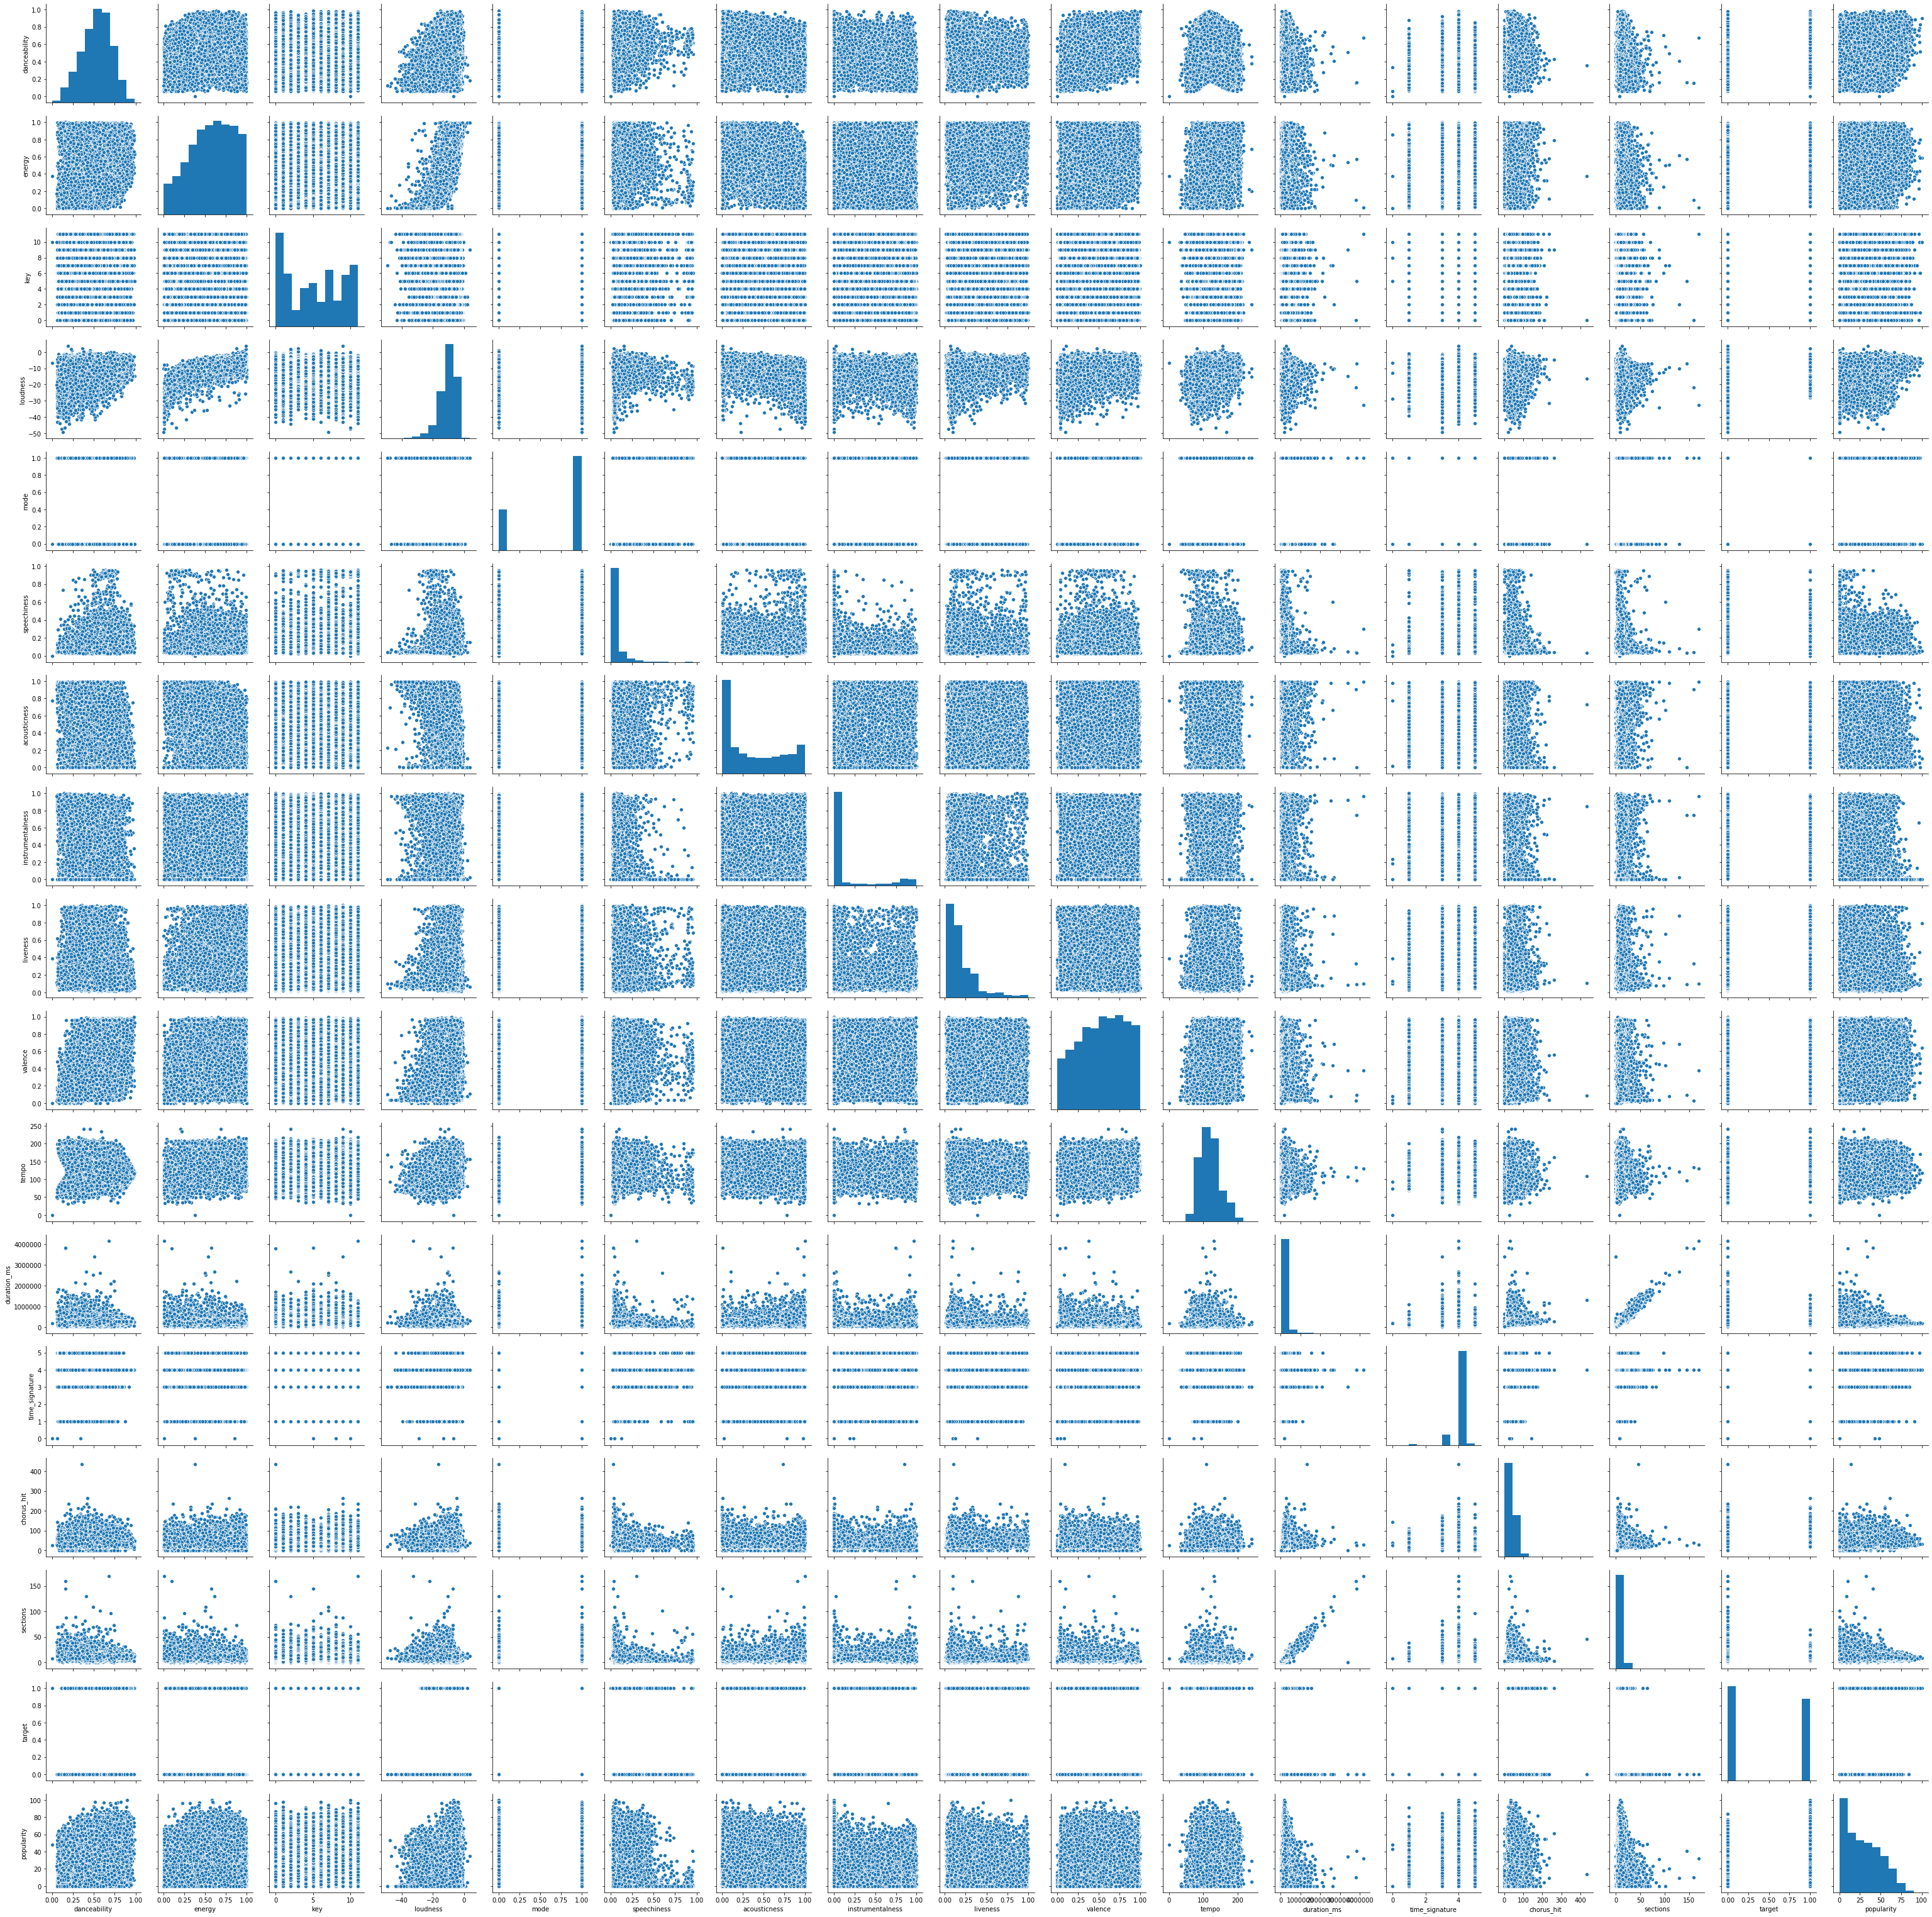

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(50,50))
sns.pairplot(work_data)

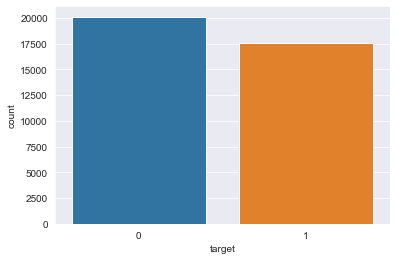

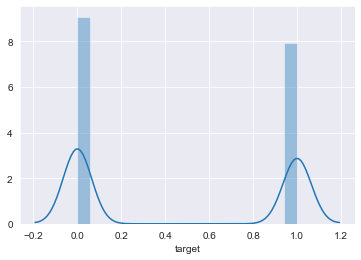

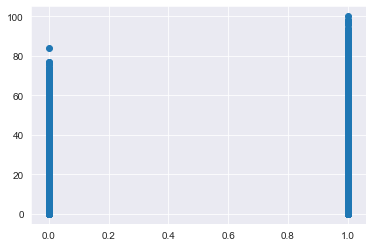

In [261]:
# The target varaible is also balanced and is also normally distrubuted(not perfectly though!)
sns.countplot(work_data['target'])
plt.show()
sns.distplot(work_data['target'])
plt.show()
plt.scatter(work_data['target'],work_data['popularity'])
plt.show()

## Box-Cox Transformation

Skewness:  0.244102116657968
Kurtosis:  0.4333178309848207


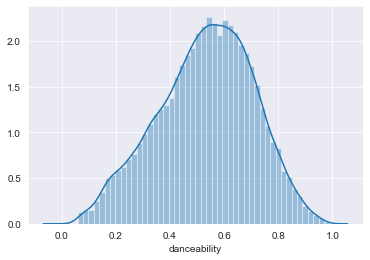

Skewness:  0.28538655548968833
Kurtosis:  0.8544226522042999


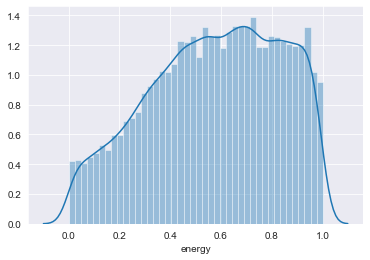

Skewness:  0.013695399628519934
Kurtosis:  1.2716722881691944


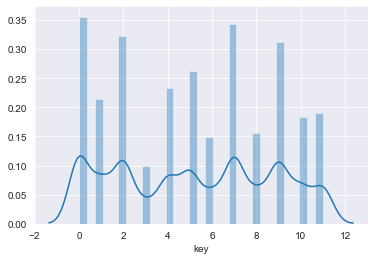

Skip
Skip
Skewness:  5.134865455837149
Kurtosis:  37.102604126443005


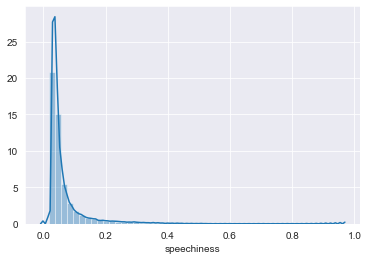

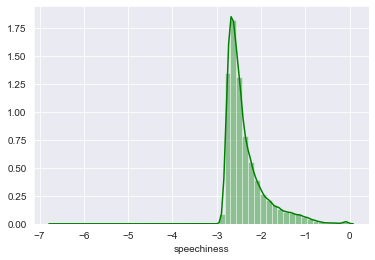

Skewness:  0.43669762316432065
Kurtosis:  1.3063470725874158


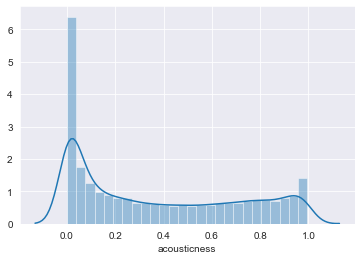

Skewness:  1.6373135018042708
Kurtosis:  0.9694081906063348


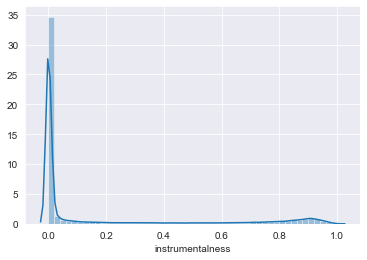

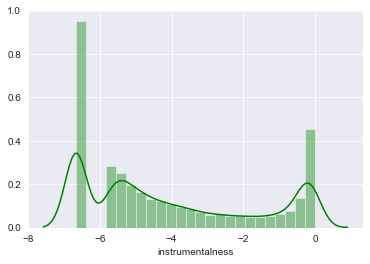

Skewness:  2.1270852340098805
Kurtosis:  4.904661547116784


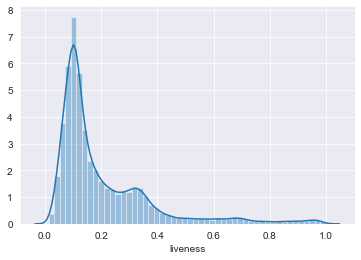

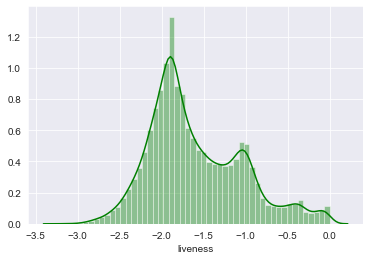

Skewness:  0.1738284902548501
Kurtosis:  1.0696622292153442


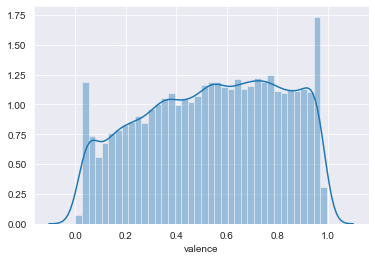

Skewness:  0.4769031022341427
Kurtosis:  0.05844547212131479


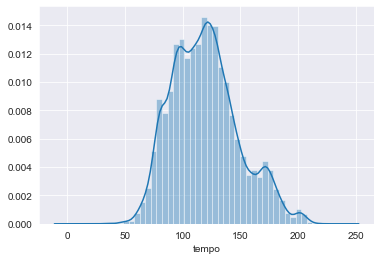

Skewness:  6.735853216475523
Kurtosis:  117.18421581524322


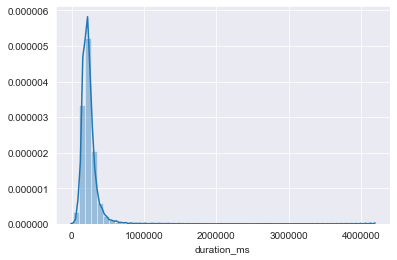

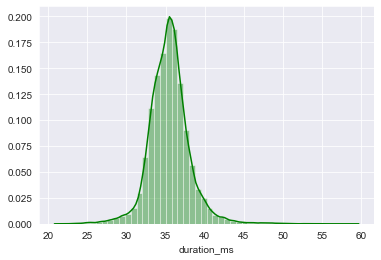

Skip
Skewness:  2.203232838123187
Kurtosis:  12.497340874033279


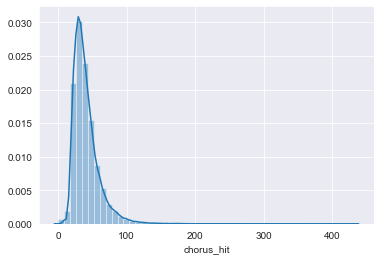

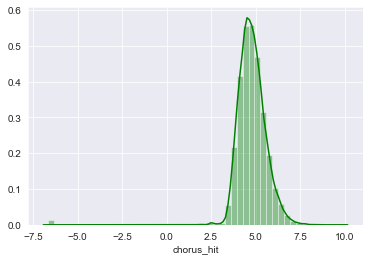

Skewness:  6.050562794488712
Kurtosis:  102.99837310091777


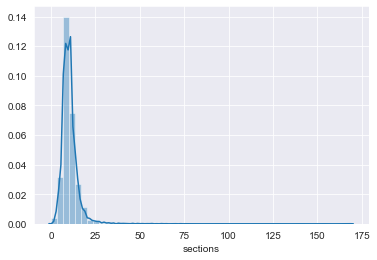

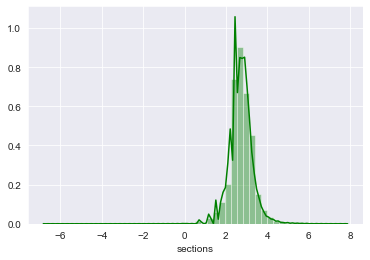

Skewness:  0.13608360285240242
Kurtosis:  1.9814812530347101


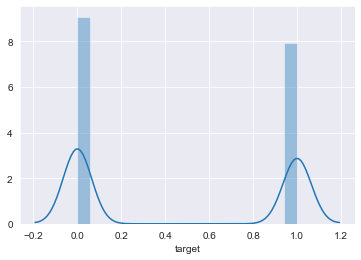

Skewness:  0.4194141571750796
Kurtosis:  0.8392109833909287


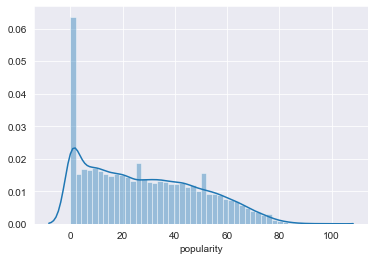

In [595]:
from scipy.stats import norm, skew, kurtosis #for some statistics
from scipy.special import boxcox
skwdcols=[]
for col in list(work_data.columns):
    if  col == 'mode' or col == 'time_signature' or col == 'loudness' :
        print('Skip')
    else:
        sns.distplot(work_data[col])
        skw_val = abs(skew(work_data[col]))
        krt_val = abs(kurtosis(work_data[col]))
        
        print('Skewness: ', skw_val)
        print('Kurtosis: ', krt_val)
        plt.show()
    
        if skw_val > 0.75:
            skwdcols.append(col)
            work_data[col] = boxcox(work_data[col], 0.15)
            work_data_reg[col] = boxcox(work_data[col], 0.15)
            print()
            sns.distplot(work_data[col], color='green')
            plt.show()

### Correlation -  For Classification
#### Here we see that the target variable is dichotomous. We will perform Point Biserial Correlation with all the continous features.
#### The code below iterates through all the features, calculating its's correlation with the target variable and appending the name of feature and it's correlation value if it is significant based on p-value(Threshold = 0.05) 

In [617]:
from scipy import stats
cols = list(work_data.columns)
sigcols = []
dropcols = []
for i in range(len(cols)):
    if cols[i] not in ['target']:
        print(cols[i] + ' vs target' )
        print((stats.pointbiserialr(work_data[cols[i]],work_data['target'])))
        if float(stats.pointbiserialr(work_data[cols[i]],work_data['target'])[0]) <= -0.10 or float(stats.pointbiserialr(work_data[cols[i]],work_data['target'])[0]) >= 0.10:
              sigcols.append((cols[i],float(stats.pointbiserialr(work_data[cols[i]],work_data['target'])[0])))
        else:
            dropcols.append(cols[i])

#sigcols.sort(key=lambda x:x[1])
work_data.drop(dropcols, axis=1, inplace=True)
dropcols

danceability vs target
PointbiserialrResult(correlation=0.3220929441217467, pvalue=0.0)
energy vs target
PointbiserialrResult(correlation=0.1641924377952319, pvalue=9.24021031227748e-226)
key vs target
PointbiserialrResult(correlation=0.006754539018572465, pvalue=0.1899826248676221)
loudness vs target
PointbiserialrResult(correlation=0.2606627037839788, pvalue=0.0)
mode vs target
PointbiserialrResult(correlation=0.09607243589069636, pvalue=6.603993119098948e-78)
speechiness vs target
PointbiserialrResult(correlation=-0.13086925872123278, pvalue=1.8288504672651982e-143)
acousticness vs target
PointbiserialrResult(correlation=-0.2262208968881067, pvalue=0.0)
instrumentalness vs target
PointbiserialrResult(correlation=-0.427820481338825, pvalue=0.0)
liveness vs target
PointbiserialrResult(correlation=-0.05794584950818642, pvalue=2.239324090412774e-29)
valence vs target
PointbiserialrResult(correlation=0.2609871963282798, pvalue=0.0)
tempo vs target
PointbiserialrResult(correlation=0.03641

['key',
 'mode',
 'liveness',
 'tempo',
 'duration_ms',
 'time_signature',
 'chorus_hit',
 'sections']

## Clustering
###### We will see if the data can be formed into clusters using :
###### 1) Elbow Method
###### 2) Silhoutte Score Method

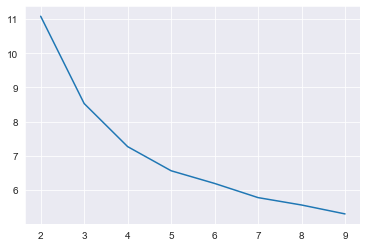

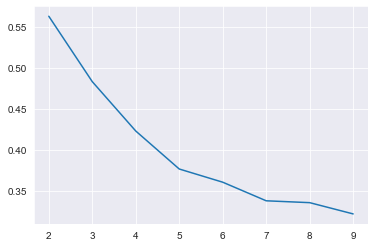

In [511]:
from sklearn.metrics import silhouette_score
distortions = []
savg = []
ssmp = []
from sklearn.cluster import KMeans
for i in range(2,10):
    clrs = {0:'red', 1:'green', 2:'blue', 3:'yellow', 4:'black', 5:'grey', 6:'brown', 7:'pink', 8:'teal', 9:'darkgreen'}
    km = KMeans(n_clusters = i, random_state=10)
    klbs = km.fit_predict(work_data)
    silhouette_avg = silhouette_score(work_data, klbs)
    savg.append(silhouette_avg)
    distortions.append(sum(np.min(cdist(work_data, km.cluster_centers_, 'euclidean'), axis=1)) / work_data.shape[0])

plt.plot(range(2,10), distortions)
plt.show()
plt.plot(range(2,10), savg)
plt.show()

In [619]:
# km = KMeans(n_clusters = 5, random_state=10)
# klbs = km.fit_predict(work_data)
# work_data['km_labels'] = klbs
y = work_data['target']
work_data.drop('target', axis=1, inplace=True)

In [644]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(work_data, y, test_size=0.30, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(26356, 8)
(11296, 8)
(26356,)
(11296,)


## PCA and Data Visualization.

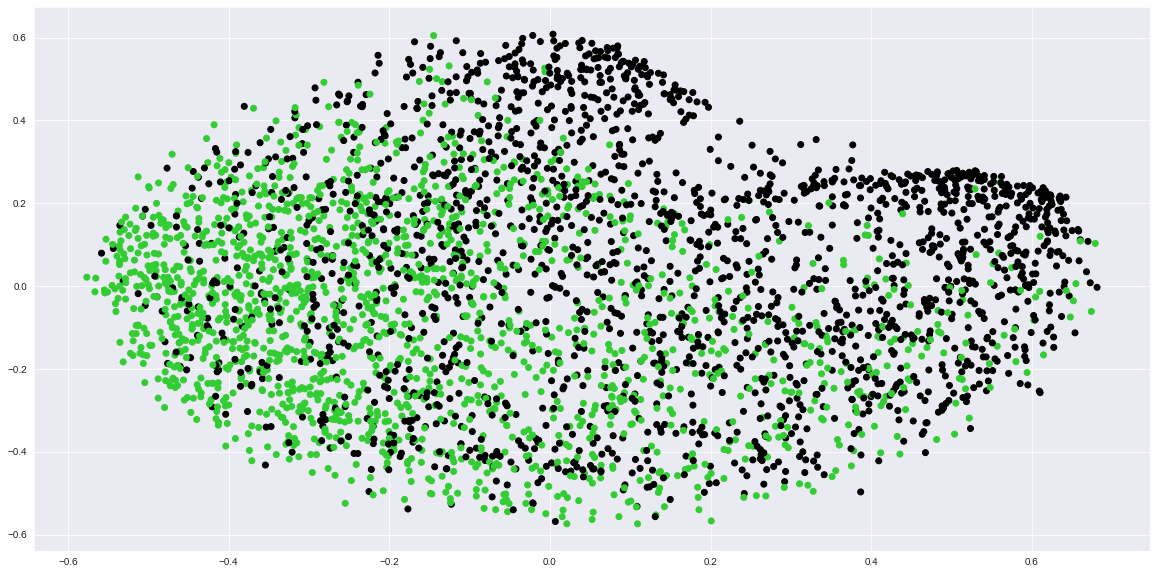

In [541]:
from sklearn.decomposition import KernelPCA, PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
ms = StandardScaler()
pca = KernelPCA(n_components=2, kernel='rbf',eigen_solver='arpack')
x_sc = ms.fit_transform(X_test)
x_sc_pca = pca.fit_transform(x_sc)
sns.set_style('darkgrid')
colors = {0:'black', 1:'limegreen'}
plt.figure(figsize=(20,10))
plt.scatter(x_sc_pca[:,0],x_sc_pca[:,1], c= y_test.map(colors))


## Modelling
###### The following models are used:
###### 1) Random Forest
###### 2) SVM
###### 3) KNN
###### 4) ANN
###### 5) AdaBoost

### 1) Random Forest

In [519]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_tr = rf.predict(X_train)
pred_ts = rf.predict(X_test)

In [521]:
print(classification_report(y_train, pred_tr))
print(f1_score(y_train, pred_tr))
print(roc_auc_score(y_train, pred_tr))
print(accuracy_score(y_train, pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18093
           1       1.00      1.00      1.00     15793

    accuracy                           1.00     33886
   macro avg       1.00      1.00      1.00     33886
weighted avg       1.00      1.00      1.00     33886

0.9999366808079528
0.9999407054070164
0.9999409785752228


In [522]:
print(classification_report(y_test, pred_ts))
print(f1_score(y_test, pred_ts))
print(roc_auc_score(y_test, pred_ts))
print(accuracy_score(y_test, pred_ts))
print(cross_val_score(rf,X_test,y_test).mean())

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2011
           1       0.78      0.82      0.80      1755

    accuracy                           0.81      3766
   macro avg       0.80      0.81      0.80      3766
weighted avg       0.81      0.81      0.81      3766

0.7961057023643949
0.806001606548598
0.8053637812002125
0.7926212039551783


### 2) SVM

In [669]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.svm import SVC

sc = StandardScaler()
x_tr_sc = sc.fit_transform(X_train)
x_ts_sc = sc.transform(X_test)
svcm = SVC(kernel='rbf')
svcm.fit(x_tr_sc,y_train)
# pred_tr = svcm.predict(x_tr_sc)
# pred_ts = svcm.predict(x_ts_sc)
# tra = cross_val_score(svcm,x_tr_sc,y_test).mean()
# tsa = cross_val_score(svcm,x_ts_sc,y_test).mean()
# print("Train Accuracy : {}".format(str(tra)))
# print("Train Accuracy : {}".format(str(tsa)))


In [525]:
# svcm = SVC(kernel='rbf')
# svcm.fit(x_tr_sc,y_train)
# pred_tr = svcm.predict(x_tr_sc)
# pred_ts = svcm.predict(x_ts_sc)
# print(cross_val_score(rf,X_train,y_test).mean())
# print(cross_val_score(rf,X_test,y_test).mean())


In [526]:
print(classification_report(y_train, pred_tr))
print(f1_score(y_train, pred_tr))
print(roc_auc_score(y_train, pred_tr))
print(accuracy_score(y_train, pred_tr))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80     18093
           1       0.76      0.84      0.80     15793

    accuracy                           0.80     33886
   macro avg       0.80      0.80      0.80     33886
weighted avg       0.80      0.80      0.80     33886

0.7955258080077183
0.8021154930514091
0.7998583485805347


In [527]:
print(classification_report(y_test, pred_ts))
print(f1_score(y_test, pred_ts))
print(roc_auc_score(y_test, pred_ts))
print(accuracy_score(y_test, pred_ts))
print(cross_val_score(rf,X_test,y_test).mean())

              precision    recall  f1-score   support

           0       0.85      0.77      0.80      2011
           1       0.76      0.84      0.80      1755

    accuracy                           0.80      3766
   macro avg       0.80      0.80      0.80      3766
weighted avg       0.81      0.80      0.80      3766

0.7976222642529046
0.8036555355799513
0.8011152416356877
0.7865151242950391


### 3) ANN

In [670]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
x_tr_sc.shape[1]


8

In [672]:
cm = Sequential()
cm.add(Dense(24, input_dim=x_tr_sc.shape[1], activation='relu'))
cm.add(Dense(12, kernel_initializer='he_uniform', activation='relu'))
cm.add(Dense(4, kernel_initializer='he_uniform', activation='relu'))
cm.add(Dense(output_dim=1, kernel_initializer='glorot_uniform', activation='tanh'))
adam = optimizers.adam(lr=0.001)
cm.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
results= cm.fit(x_tr_sc,y_train, epochs=200)


c:\users\gagan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="glorot_uniform", activation="tanh", units=1)`
  """


Epoch 1/200
26356/26356 [==============================] - 3s 119us/step - loss: 0.5033 - accuracy: 0.7486
Epoch 2/200
26356/26356 [==============================] - 3s 103us/step - loss: 0.4552 - accuracy: 0.7810
Epoch 3/200
26356/26356 [==============================] - 3s 104us/step - loss: 0.4503 - accuracy: 0.7831
Epoch 4/200
26356/26356 [==============================] - 3s 110us/step - loss: 0.4469 - accuracy: 0.7857
Epoch 5/200
26356/26356 [==============================] - 3s 108us/step - loss: 0.4444 - accuracy: 0.7876
Epoch 6/200
26356/26356 [==============================] - 3s 110us/step - loss: 0.4426 - accuracy: 0.7870
Epoch 7/200
26356/26356 [==============================] - 3s 108us/step - loss: 0.4408 - accuracy: 0.7889
Epoch 8/200
26356/26356 [==============================] - 3s 105us/step - loss: 0.4393 - accuracy: 0.7884
Epoch 9/200
26356/26356 [==============================] - 3s 104us/step - loss: 0.4376 - accuracy: 0.7895
Epoch 10/200
26356/26356 [===========

Epoch 77/200
26356/26356 [==============================] - 3s 107us/step - loss: 0.4227 - accuracy: 0.7987
Epoch 78/200
26356/26356 [==============================] - 3s 109us/step - loss: 0.4224 - accuracy: 0.7992
Epoch 79/200
26356/26356 [==============================] - 3s 109us/step - loss: 0.4221 - accuracy: 0.7997
Epoch 80/200
26356/26356 [==============================] - 3s 106us/step - loss: 0.4211 - accuracy: 0.7997
Epoch 81/200
26356/26356 [==============================] - 3s 108us/step - loss: 0.4213 - accuracy: 0.7994
Epoch 82/200
26356/26356 [==============================] - 3s 111us/step - loss: 0.4206 - accuracy: 0.8008
Epoch 83/200
26356/26356 [==============================] - 3s 106us/step - loss: 0.4205 - accuracy: 0.7989
Epoch 84/200
26356/26356 [==============================] - 3s 105us/step - loss: 0.4201 - accuracy: 0.7999
Epoch 85/200
26356/26356 [==============================] - 3s 102us/step - loss: 0.4204 - accuracy: 0.7996
Epoch 86/200
26356/26356 [==

26356/26356 [==============================] - 2s 60us/step - loss: 0.4167 - accuracy: 0.8027
Epoch 153/200
26356/26356 [==============================] - 2s 60us/step - loss: 0.4163 - accuracy: 0.8029
Epoch 154/200
26356/26356 [==============================] - 2s 60us/step - loss: 0.4167 - accuracy: 0.8008
Epoch 155/200
26356/26356 [==============================] - 2s 62us/step - loss: 0.4155 - accuracy: 0.8018
Epoch 156/200
26356/26356 [==============================] - 2s 62us/step - loss: 0.4152 - accuracy: 0.8025
Epoch 157/200
26356/26356 [==============================] - 2s 61us/step - loss: 0.4209 - accuracy: 0.8031
Epoch 158/200
26356/26356 [==============================] - 2s 62us/step - loss: 0.4157 - accuracy: 0.8024
Epoch 159/200
26356/26356 [==============================] - 2s 62us/step - loss: 0.4158 - accuracy: 0.8025
Epoch 160/200
26356/26356 [==============================] - 2s 62us/step - loss: 0.4159 - accuracy: 0.8022
Epoch 161/200
26356/26356 [===============

In [679]:
pred_tr = cm.predict_classes(x_tr_sc)
pred_ts = cm.predict_classes(x_ts_sc)
print(classification_report(y_train, pred_tr))
print(f1_score(y_train, pred_tr))
print(roc_auc_score(y_train, pred_tr))
print(accuracy_score(y_train, pred_tr))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81     14073
           1       0.76      0.84      0.80     12283

    accuracy                           0.80     26356
   macro avg       0.80      0.81      0.80     26356
weighted avg       0.81      0.80      0.80     26356

0.7986934712447019
0.805643635705863
0.8035741387160419


In [453]:
print(classification_report(y_test, pred_ts))
print(f1_score(y_test, pred_ts))
print(roc_auc_score(y_test, pred_ts))
print(accuracy_score(y_test, pred_ts))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       693
           1       0.71      0.63      0.67       450

    accuracy                           0.75      1143
   macro avg       0.74      0.73      0.74      1143
weighted avg       0.75      0.75      0.75      1143

0.6698002350176263
0.7329725829725829
0.7541557305336833


### 4) KNN

In [682]:
knc = KNeighborsClassifier(n_neighbors=29)
knc.fit(x_tr_sc,y_train)
pred_tr = knc.predict(x_tr_sc)
pred_ts = knc.predict(x_ts_sc)

In [683]:
print(classification_report(y_train, pred_tr))
print(f1_score(y_train, pred_tr))
print(roc_auc_score(y_train, pred_tr))
print(accuracy_score(y_train, pred_tr))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80     14073
           1       0.76      0.84      0.80     12283

    accuracy                           0.80     26356
   macro avg       0.80      0.80      0.80     26356
weighted avg       0.80      0.80      0.80     26356

0.7953283996299723
0.8011616241914732
0.7985278494460465


In [684]:
print(classification_report(y_test, pred_ts))
print(f1_score(y_test, pred_ts))
print(roc_auc_score(y_test, pred_ts))
print(accuracy_score(y_test, pred_ts))
print(cross_val_score(knc,X_test,y_test).mean())

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      6031
           1       0.75      0.83      0.79      5265

    accuracy                           0.79     11296
   macro avg       0.79      0.79      0.79     11296
weighted avg       0.80      0.79      0.79     11296

0.7884770708067845
0.7940750723981808
0.7913420679886686
0.7518591905730079


### 5) AdaBoost

In [655]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(base_estimator=RandomForestClassifier())
abc.fit(X_train,y_train)
pred_tr = abc.predict(X_train)
pred_ts = abc.predict(X_test)

In [656]:
print(classification_report(y_train, pred_tr))
print(f1_score(y_train, pred_tr))
print(roc_auc_score(y_train, pred_tr))
print(accuracy_score(y_train, pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14073
           1       1.00      1.00      1.00     12283

    accuracy                           1.00     26356
   macro avg       1.00      1.00      1.00     26356
weighted avg       1.00      1.00      1.00     26356

0.9999592949892132
0.9999644709727848
0.9999620579754136


In [658]:
print(classification_report(y_test, pred_ts))
print(f1_score(y_test, pred_ts))
print(roc_auc_score(y_test, pred_ts))
print(accuracy_score(y_test, pred_ts))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      6031
           1       0.77      0.82      0.80      5265

    accuracy                           0.80     11296
   macro avg       0.80      0.80      0.80     11296
weighted avg       0.81      0.80      0.80     11296

0.7960025671587054
0.8043913191152454
0.8030276203966006


### EXTRAS

In [ ]:
# from scipy.stats import kurtosis, kurtosistest, skewtest, normaltest

# for col in list(work_data.columns):
#     print(col)
#     print('Skewness')
#     print(skew(work_data[col]))
#     print(skewtest(work_data[col]))
# #     print(normaltest(work_data[col]))

#     print('Kurtosis')
#     print(kurtosis(work_data[col], fisher=False))
#     print(kurtosistest(work_data[col]))
# #     print(normaltest(work_data[col]))
